In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["3", "4", "5", "6"],
    channels=["2", "4", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

In [4]:
dict_synerg = {}
for s, gdict in dc.data_set_smooth.items():
    dict_synerg[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        #print(f"subject {s}; gesture {g}")
        #snf.plot_template()
        # save template to dict
        dict_synerg[s][g] = snf.fused_similarity_template

---

subject 30; gesture 5_0_2; avg 2.922049242257614; sd 0.1584055666386537
subject 30; gesture 5_0_2; PoV: 0.7214523663121767
subject 30; gesture 3_0_1; avg 2.3042719567535115; sd 0.13791303074217942
subject 30; gesture 3_0_1; PoV: 0.6773236481439897


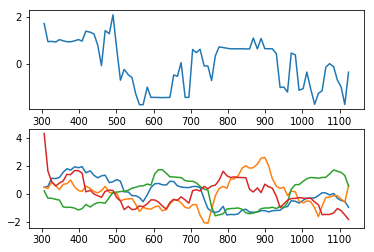

subject 30; gesture 4_1_1; avg 2.455682932765466; sd 0.13509822936657867
subject 30; gesture 4_1_1; PoV: 0.697240723214343
subject 30; gesture 4_1_2; avg 2.9503869508110023; sd 0.1383795788267736
subject 30; gesture 4_1_2; PoV: 0.7271582463961457
subject 30; gesture 5_1_2; avg 4.13259607469532; sd 0.1803265119811531
subject 30; gesture 5_1_2; PoV: 0.7813912382560075
subject 30; gesture 6_1_2; avg 2.2520918900928653; sd 0.1397131933113752
subject 30; gesture 6_1_2; PoV: 0.6705392998267933
subject 30; gesture 4_0_1; avg 2.391708277413662; sd 0.13684641779347026
subject 30; gesture 4_0_1; PoV: 0.6879353436865057
subject 30; gesture 3_0_2; avg 3.088594666704004; sd 0.15901861709785634
subject 30; gesture 3_0_2; PoV: 0.7350653982154512


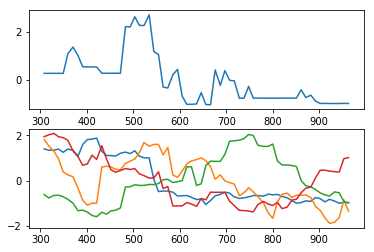

subject 30; gesture 5_1_1; avg 2.368990408001781; sd 0.14220682394299908
subject 30; gesture 5_1_1; PoV: 0.6845450465655077
subject 30; gesture 6_1_1; avg 2.1545735591400885; sd 0.13326186977303872
subject 30; gesture 6_1_1; PoV: 0.6639191419810062
subject 30; gesture 6_0_2; avg 2.8920641010765533; sd 0.14574726612559033
subject 30; gesture 6_0_2; PoV: 0.7265936571656954
subject 30; gesture 3_1_2; avg 3.3270350906177266; sd 0.19762238388474876
subject 30; gesture 3_1_2; PoV: 0.7273262345389722


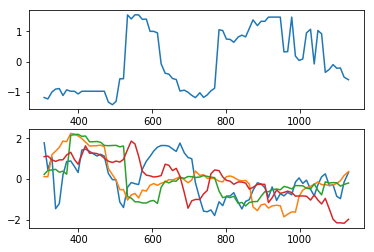

subject 30; gesture 3_1_1; avg 2.5717880186351487; sd 0.12536640169813398
subject 30; gesture 3_1_1; PoV: 0.7042306838701898


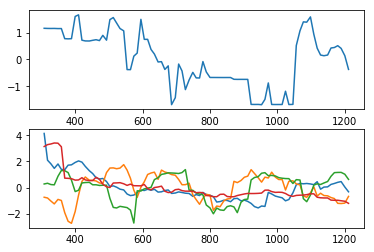

subject 30; gesture 6_0_1; avg 2.499175515235762; sd 0.12803352888705746
subject 30; gesture 6_0_1; PoV: 0.6987488818691059
subject 30; gesture 5_0_1; avg 2.6614780719470446; sd 0.14082764233123948
subject 30; gesture 5_0_1; PoV: 0.706244864766705
subject 30; gesture 4_0_2; avg 3.01594931127496; sd 0.15510090524811157
subject 30; gesture 4_0_2; PoV: 0.7248390458171203
subject 06; gesture 5_0_2; avg 2.7371173197680503; sd 0.14216829312479917
subject 06; gesture 5_0_2; PoV: 0.7142280949037136
subject 06; gesture 3_0_1; avg 4.039022520237827; sd 0.20809794377986338
subject 06; gesture 3_0_1; PoV: 0.7727822519244654


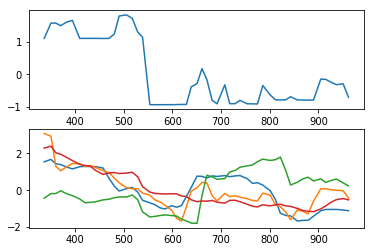

subject 06; gesture 4_1_1; avg 2.6296046022331523; sd 0.15585277231007647
subject 06; gesture 4_1_1; PoV: 0.6991713918731929
subject 06; gesture 4_1_2; avg 2.4134777648820926; sd 0.27642741954826305
subject 06; gesture 4_1_2; PoV: 0.6550110411128177
subject 06; gesture 5_1_2; avg 5.198796806195594; sd 0.1660264811731329
subject 06; gesture 5_1_2; PoV: 0.8224721160577979
subject 06; gesture 6_1_2; avg 9.892646050604354; sd 0.25234169825416525
subject 06; gesture 6_1_2; PoV: 0.8863264080461347
subject 06; gesture 4_0_1; avg 3.097039046168846; sd 0.1552285847285241
subject 06; gesture 4_0_1; PoV: 0.7329109272065978
subject 06; gesture 3_0_2; avg 2.5342272154058207; sd 0.14837614194854953
subject 06; gesture 3_0_2; PoV: 0.6908021564317174


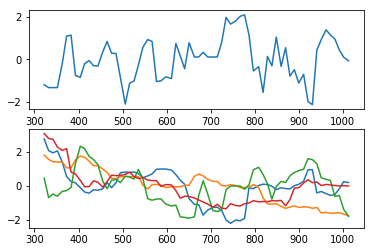

subject 06; gesture 5_1_1; avg 2.9152185802057966; sd 0.15022717033420238
subject 06; gesture 5_1_1; PoV: 0.7245446882489982
subject 06; gesture 6_1_1; avg 3.480328600409423; sd 0.16805503653338896
subject 06; gesture 6_1_1; PoV: 0.7568104762433963
subject 06; gesture 6_0_2; avg 3.5980661256639688; sd 0.17747432673444724
subject 06; gesture 6_0_2; PoV: 0.7578695119546824
subject 06; gesture 3_1_2; avg 2.2859306790663103; sd 0.13172299916402547
subject 06; gesture 3_1_2; PoV: 0.6814090939495969


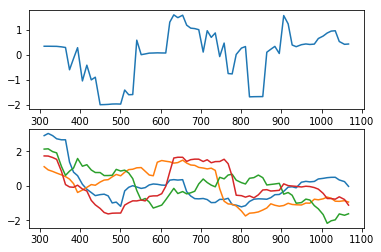

subject 06; gesture 3_1_1; avg 5.599539913412256; sd 0.2506861738024128
subject 06; gesture 3_1_1; PoV: 0.8164833724411378


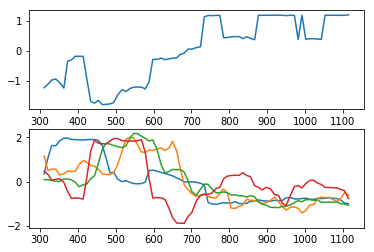

subject 06; gesture 6_0_1; avg 4.540285831313255; sd 0.14331226553508244
subject 06; gesture 6_0_1; PoV: 0.8019005279082688
subject 06; gesture 5_0_1; avg 2.4499868412239296; sd 0.11819550927328082
subject 06; gesture 5_0_1; PoV: 0.6944059162064935
subject 06; gesture 4_0_2; avg 2.5949542602517544; sd 0.12965323073467722
subject 06; gesture 4_0_2; PoV: 0.7101694580682456
subject 09; gesture 5_0_2; avg 6.59507670708231; sd 0.16872861017453053
subject 09; gesture 5_0_2; PoV: 0.8531421431818815
subject 09; gesture 3_0_1; avg 7.538081515297536; sd 0.20209949691479623
subject 09; gesture 3_0_1; PoV: 0.864333841146946


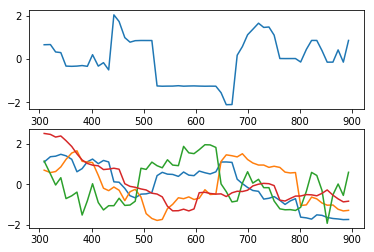

subject 09; gesture 4_1_1; avg 4.6923342659521134; sd 0.19238272031965806
subject 09; gesture 4_1_1; PoV: 0.8048630338724084
subject 09; gesture 4_1_2; avg 3.7906892696215104; sd 0.17199365853593337
subject 09; gesture 4_1_2; PoV: 0.7730931611031119
subject 09; gesture 5_1_2; avg 3.471978269926117; sd 0.15651408314073012
subject 09; gesture 5_1_2; PoV: 0.7560595060170736
subject 09; gesture 6_1_2; avg 4.242692944050273; sd 0.15598394710988342
subject 09; gesture 6_1_2; PoV: 0.7924494700542516
subject 09; gesture 4_0_1; avg 3.0151604529484386; sd 0.16604347404653644
subject 09; gesture 4_0_1; PoV: 0.7258494023849162
subject 09; gesture 3_0_2; avg 2.497125716238925; sd 0.19057243230885804
subject 09; gesture 3_0_2; PoV: 0.6825332987177796


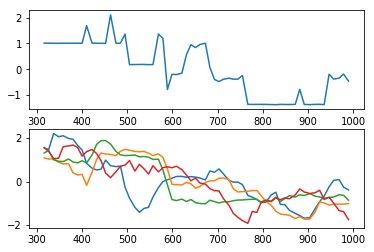

subject 09; gesture 5_1_1; avg 3.026276934588537; sd 0.16804357597487685
subject 09; gesture 5_1_1; PoV: 0.7284441419819401
subject 09; gesture 6_1_1; avg 2.420417524526529; sd 0.12928848100080245
subject 09; gesture 6_1_1; PoV: 0.6930894289489846
subject 09; gesture 6_0_2; avg 5.55557178384808; sd 0.19715256830149894
subject 09; gesture 6_0_2; PoV: 0.8232429549731111
subject 09; gesture 3_1_2; avg 3.5643359882207033; sd 0.15397419004982285
subject 09; gesture 3_1_2; PoV: 0.7615930301611482


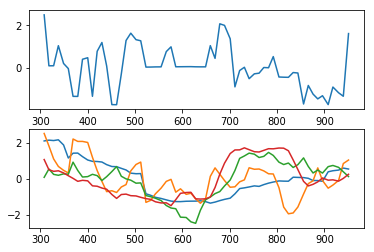

subject 09; gesture 3_1_1; avg 4.1406975688338035; sd 0.21792077125083212
subject 09; gesture 3_1_1; PoV: 0.7733468568262719


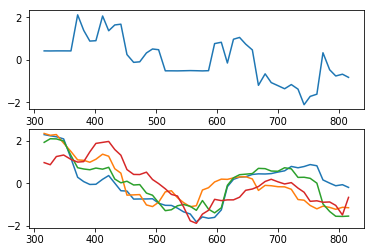

subject 09; gesture 6_0_1; avg 4.238680036071739; sd 0.15484421012636757
subject 09; gesture 6_0_1; PoV: 0.7945935135570045
subject 09; gesture 5_0_1; avg 2.9917631701405916; sd 0.17269809020224608
subject 09; gesture 5_0_1; PoV: 0.7215020298457983
subject 09; gesture 4_0_2; avg 6.078441320710776; sd 0.2573466040557233
subject 09; gesture 4_0_2; PoV: 0.8307854528695309
subject 03; gesture 5_0_2; avg 2.321375299814255; sd 0.13447201358677513
subject 03; gesture 5_0_2; PoV: 0.6840117875293601
subject 03; gesture 3_0_1; avg 2.8796977991622894; sd 0.16518931580974885
subject 03; gesture 3_0_1; PoV: 0.7125312609834581


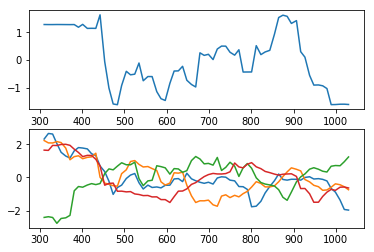

subject 03; gesture 4_1_1; avg 4.225154467950239; sd 0.16907251422345476
subject 03; gesture 4_1_1; PoV: 0.7844379880763307
subject 03; gesture 4_1_2; avg 4.23863302837937; sd 0.22013893965720802
subject 03; gesture 4_1_2; PoV: 0.7793103132375953
subject 03; gesture 5_1_2; avg 3.8823522904370296; sd 0.20104969885346843
subject 03; gesture 5_1_2; PoV: 0.7631094773364713
subject 03; gesture 6_1_2; avg 4.4933857898902705; sd 0.18495858002450516
subject 03; gesture 6_1_2; PoV: 0.7973267608417217
subject 03; gesture 4_0_1; avg 2.55557261260866; sd 0.14927740704617937
subject 03; gesture 4_0_1; PoV: 0.6940469679188939
subject 03; gesture 3_0_2; avg 2.8982623109554133; sd 0.1352891216862449
subject 03; gesture 3_0_2; PoV: 0.7265801202481889


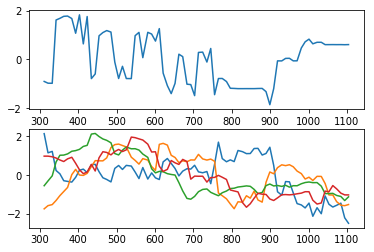

subject 03; gesture 5_1_1; avg 3.7019246110502513; sd 0.14872041947521306
subject 03; gesture 5_1_1; PoV: 0.7725693975361211
subject 03; gesture 6_1_1; avg 3.0180463684098844; sd 0.1549732112203892
subject 03; gesture 6_1_1; PoV: 0.7326204989134649
subject 03; gesture 6_0_2; avg 2.4787737529803584; sd 0.14742425436957668
subject 03; gesture 6_0_2; PoV: 0.6857431379072035
subject 03; gesture 3_1_2; avg 3.6767932265758985; sd 0.17016333767195177
subject 03; gesture 3_1_2; PoV: 0.765599752317919


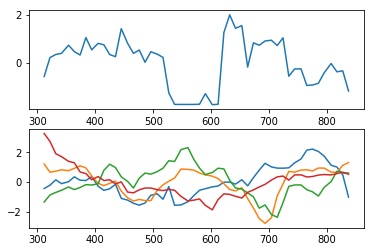

subject 03; gesture 3_1_1; avg 2.61834077722692; sd 0.1501529612301695
subject 03; gesture 3_1_1; PoV: 0.7021418609469844


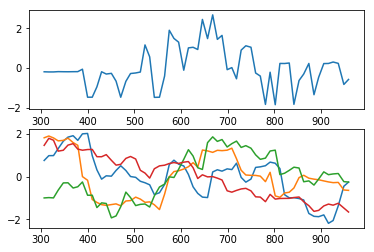

subject 03; gesture 6_0_1; avg 4.659721289430422; sd 0.17684121451723386
subject 03; gesture 6_0_1; PoV: 0.8012485603200051
subject 03; gesture 5_0_1; avg 6.164073551076214; sd 0.19818734567186638
subject 03; gesture 5_0_1; PoV: 0.8340783613381617
subject 03; gesture 4_0_2; avg 2.452174418777517; sd 0.14342090136007596
subject 03; gesture 4_0_2; PoV: 0.6889594293169609
subject 05; gesture 5_0_2; avg 3.1646410502955837; sd 0.15682898775061818
subject 05; gesture 5_0_2; PoV: 0.7368971580593348
subject 05; gesture 3_0_1; avg 4.064479923818278; sd 0.16904778388729003
subject 05; gesture 3_0_1; PoV: 0.7844391918569482


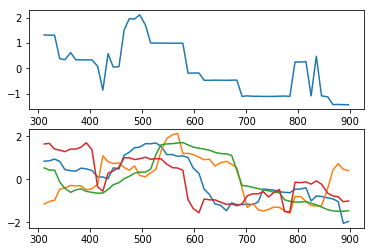

subject 05; gesture 4_1_1; avg 2.8954192761181283; sd 0.16532754873002378
subject 05; gesture 4_1_1; PoV: 0.715670566210165
subject 05; gesture 4_1_2; avg 2.15782879928236; sd 0.1397646037749604
subject 05; gesture 4_1_2; PoV: 0.6607774135704966
subject 05; gesture 5_1_2; avg 6.53135227192436; sd 0.22473124048910642
subject 05; gesture 5_1_2; PoV: 0.8423770997991369
subject 05; gesture 6_1_2; avg 2.558002339335638; sd 0.15178457917129734
subject 05; gesture 6_1_2; PoV: 0.7006134459895387
subject 05; gesture 4_0_1; avg 3.7990603534501317; sd 0.1649536505407451
subject 05; gesture 4_0_1; PoV: 0.7740571206239325
subject 05; gesture 3_0_2; avg 2.424765815691642; sd 0.1287290159242558
subject 05; gesture 3_0_2; PoV: 0.6869345515259112


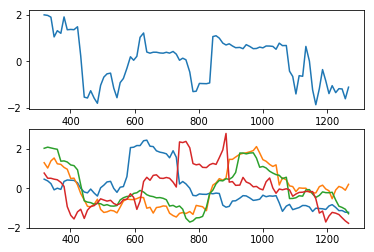

subject 05; gesture 5_1_1; avg 3.5777369924256552; sd 0.15347034032133577
subject 05; gesture 5_1_1; PoV: 0.7594872203054011
subject 05; gesture 6_1_1; avg 4.771432004020668; sd 0.1604139377179907
subject 05; gesture 6_1_1; PoV: 0.8100248011095947
subject 05; gesture 6_0_2; avg 3.217449837237396; sd 0.16683800936521778
subject 05; gesture 6_0_2; PoV: 0.7421621008889194
subject 05; gesture 3_1_2; avg 2.7934917715739127; sd 0.1460367195513371
subject 05; gesture 3_1_2; PoV: 0.7183537921846636


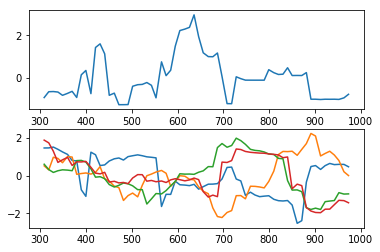

subject 05; gesture 3_1_1; avg 2.9080155283194045; sd 0.15066865069418317
subject 05; gesture 3_1_1; PoV: 0.7250212588259255


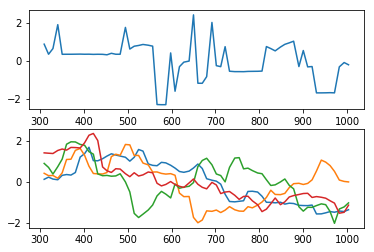

subject 05; gesture 6_0_1; avg 3.2686390224150497; sd 0.16243013126270017
subject 05; gesture 6_0_1; PoV: 0.7396130289546289
subject 05; gesture 5_0_1; avg 2.4701038286280887; sd 0.15028468497458952
subject 05; gesture 5_0_1; PoV: 0.6935280686600422
subject 05; gesture 4_0_2; avg 4.495471100552802; sd 0.15921954019532852
subject 05; gesture 4_0_2; PoV: 0.7983210745837274
subject 21; gesture 5_0_2; avg 2.818579850967368; sd 0.17551780520587154
subject 21; gesture 5_0_2; PoV: 0.7099489490656985
subject 21; gesture 3_0_1; avg 2.5095845895496613; sd 0.1567505707860398
subject 21; gesture 3_0_1; PoV: 0.6878168269878147


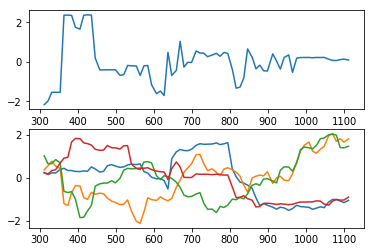

subject 21; gesture 4_1_1; avg 3.9353594195184844; sd 0.18261479000064249
subject 21; gesture 4_1_1; PoV: 0.7743575345099946
subject 21; gesture 4_1_2; avg 3.158458050879607; sd 0.3292820611220403
subject 21; gesture 4_1_2; PoV: 0.7079825408603144
subject 21; gesture 5_1_2; avg 2.9817921872555124; sd 0.14709525703170367
subject 21; gesture 5_1_2; PoV: 0.7287513490963676
subject 21; gesture 6_1_2; avg 3.1118657187042884; sd 0.14495620161290326
subject 21; gesture 6_1_2; PoV: 0.7401744737733285
subject 21; gesture 4_0_1; avg 2.2831720273043086; sd 0.14321723427147506
subject 21; gesture 4_0_1; PoV: 0.6703263660508223
subject 21; gesture 3_0_2; avg 3.253682430017048; sd 0.14503461211363064
subject 21; gesture 3_0_2; PoV: 0.7499997726459876


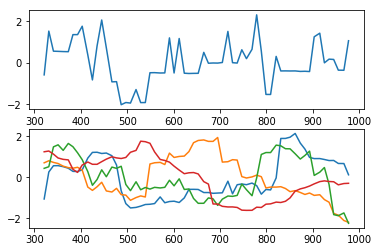

subject 21; gesture 5_1_1; avg 4.711948582892285; sd 0.16491616736356093
subject 21; gesture 5_1_1; PoV: 0.8028844212981384
subject 21; gesture 6_1_1; avg 3.9861061956722277; sd 0.16020031202617013
subject 21; gesture 6_1_1; PoV: 0.7806217783547614
subject 21; gesture 6_0_2; avg 2.8841528134256613; sd 0.19042830355649112
subject 21; gesture 6_0_2; PoV: 0.7133901494382463
subject 21; gesture 3_1_2; avg 3.830860294099882; sd 0.16496785664377328
subject 21; gesture 3_1_2; PoV: 0.774299293463816


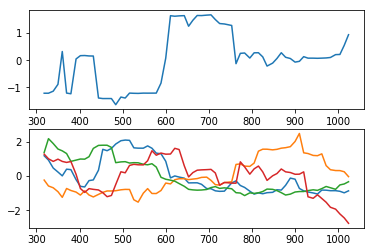

subject 21; gesture 3_1_1; avg 2.5806250865120455; sd 0.20414413113205887
subject 21; gesture 3_1_1; PoV: 0.6857169110752621


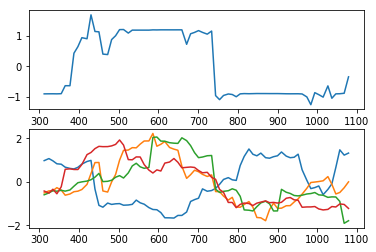

subject 21; gesture 6_0_1; avg 3.230802318566912; sd 0.16500736674991653
subject 21; gesture 6_0_1; PoV: 0.7431713632503263
subject 21; gesture 5_0_1; avg 2.2358697209755927; sd 0.14756285794966967
subject 21; gesture 5_0_1; PoV: 0.6711388058101586
subject 21; gesture 4_0_2; avg 3.40808124465796; sd 0.1543802931046567
subject 21; gesture 4_0_2; PoV: 0.7510285724017004
subject 17; gesture 5_0_2; avg 5.434857729158041; sd 0.24061343474839744
subject 17; gesture 5_0_2; PoV: 0.8141851943463483
subject 17; gesture 3_0_1; avg 3.244473176562195; sd 0.1429833324760479
subject 17; gesture 3_0_1; PoV: 0.7452150625202245


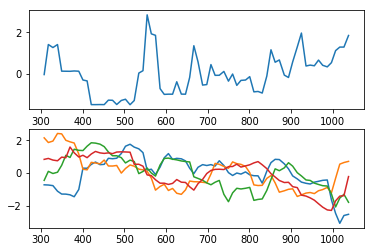

subject 17; gesture 4_1_1; avg 2.7967954119248004; sd 0.16303261068606237
subject 17; gesture 4_1_1; PoV: 0.7135883057676995
subject 17; gesture 4_1_2; avg 2.883367732743673; sd 0.1740337951766265
subject 17; gesture 4_1_2; PoV: 0.7166639734741901
subject 17; gesture 5_1_2; avg 2.187183208068882; sd 0.13458076212305506
subject 17; gesture 5_1_2; PoV: 0.6702993340836634
subject 17; gesture 6_1_2; avg 2.1969133629020825; sd 0.13891596659710045
subject 17; gesture 6_1_2; PoV: 0.6640544900162979
subject 17; gesture 4_0_1; avg 2.6781248582531934; sd 0.14222554367796583
subject 17; gesture 4_0_1; PoV: 0.7062234529459678
subject 17; gesture 3_0_2; avg 3.907955167810215; sd 0.18229389283929645
subject 17; gesture 3_0_2; PoV: 0.7671089372872205


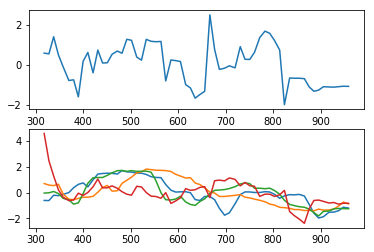

subject 17; gesture 5_1_1; avg 3.4868969521858952; sd 0.13879203318237612
subject 17; gesture 5_1_1; PoV: 0.7629270288679202
subject 17; gesture 6_1_1; avg 3.5563160834129772; sd 0.14237792826439274
subject 17; gesture 6_1_1; PoV: 0.7637441190513982
subject 17; gesture 6_0_2; avg 4.381030291925309; sd 0.15935982406091503
subject 17; gesture 6_0_2; PoV: 0.7994340814708563
subject 17; gesture 3_1_2; avg 4.293939718502082; sd 0.15429978855041013
subject 17; gesture 3_1_2; PoV: 0.7934741144504813


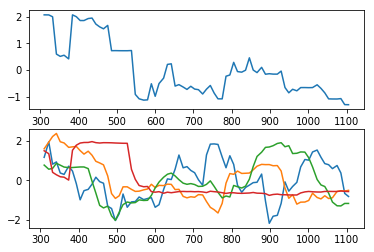

subject 17; gesture 3_1_1; avg 4.39648497351571; sd 0.16012993642309745
subject 17; gesture 3_1_1; PoV: 0.7953766202532723


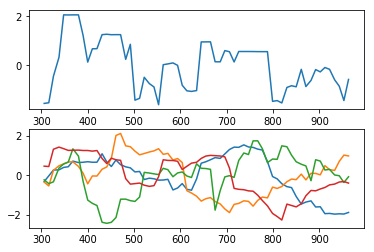

subject 17; gesture 6_0_1; avg 2.9308295800001063; sd 0.1563511665137887
subject 17; gesture 6_0_1; PoV: 0.716581584766604
subject 17; gesture 5_0_1; avg 3.5074392592498267; sd 0.15508351194628292
subject 17; gesture 5_0_1; PoV: 0.7602317788555578
subject 17; gesture 4_0_2; avg 2.9850385482279322; sd 0.14542663779313583
subject 17; gesture 4_0_2; PoV: 0.730448093080925
subject 01; gesture 5_0_2; avg 3.527577104399721; sd 0.15329467867791063
subject 01; gesture 5_0_2; PoV: 0.7615129028106247
subject 01; gesture 3_0_1; avg 2.3216112840397685; sd 0.13287021263269247
subject 01; gesture 3_0_1; PoV: 0.676825857672847


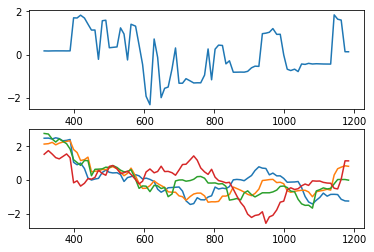

subject 01; gesture 4_1_1; avg 3.556629508658863; sd 0.15071598488632898
subject 01; gesture 4_1_1; PoV: 0.7603894903686234
subject 01; gesture 4_1_2; avg 4.402856770389569; sd 0.24887294940567928
subject 01; gesture 4_1_2; PoV: 0.7826555931031144
subject 01; gesture 5_1_2; avg 3.603509953900693; sd 0.14351489408734164
subject 01; gesture 5_1_2; PoV: 0.7678338332143462
subject 01; gesture 6_1_2; avg 3.4084770557029094; sd 0.1509948073894942
subject 01; gesture 6_1_2; PoV: 0.753978726388813
subject 01; gesture 4_0_1; avg 2.874636425792365; sd 0.14370877201441423
subject 01; gesture 4_0_1; PoV: 0.7189753710510828
subject 01; gesture 3_0_2; avg 4.464727920911995; sd 0.16408432249560928
subject 01; gesture 3_0_2; PoV: 0.7959547796656526


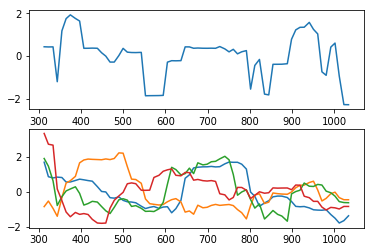

subject 01; gesture 5_1_1; avg 2.8253887140428615; sd 0.1403379360229898
subject 01; gesture 5_1_1; PoV: 0.7212211291510612
subject 01; gesture 6_1_1; avg 2.446798201196067; sd 0.15335449596871523
subject 01; gesture 6_1_1; PoV: 0.6847440169442125
subject 01; gesture 6_0_2; avg 5.218942391934868; sd 0.20147984325567228
subject 01; gesture 6_0_2; PoV: 0.813167178378963
subject 01; gesture 3_1_2; avg 4.607399937326382; sd 0.2211697752919751
subject 01; gesture 3_1_2; PoV: 0.7872744464897924


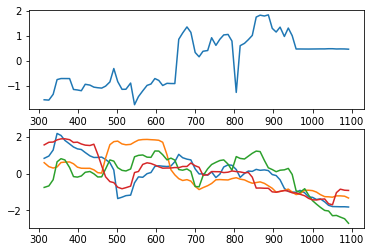

subject 01; gesture 3_1_1; avg 4.332970844912915; sd 0.15809663443486088
subject 01; gesture 3_1_1; PoV: 0.7934374928627816


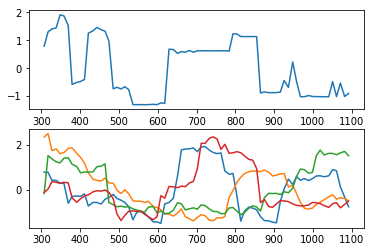

subject 01; gesture 6_0_1; avg 3.6212837407108895; sd 0.13766024868398336
subject 01; gesture 6_0_1; PoV: 0.7655604181648387
subject 01; gesture 5_0_1; avg 2.4955455916919824; sd 0.1350999683927804
subject 01; gesture 5_0_1; PoV: 0.6948909001179391
subject 01; gesture 4_0_2; avg 4.28498229566699; sd 0.1597355137648425
subject 01; gesture 4_0_2; PoV: 0.7877250587115807
subject 16; gesture 5_0_2; avg 4.741582813174859; sd 0.2046789011620074
subject 16; gesture 5_0_2; PoV: 0.7948559465238351
subject 16; gesture 3_0_1; avg 2.831059706641758; sd 0.13799635846678263
subject 16; gesture 3_0_1; PoV: 0.7180082191452849


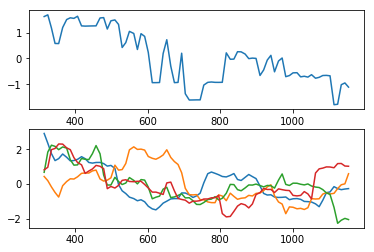

subject 16; gesture 4_1_1; avg 2.7062078538548775; sd 0.16426637570725477
subject 16; gesture 4_1_1; PoV: 0.7028370361475829
subject 16; gesture 4_1_2; avg 2.480517780722718; sd 0.22365350118680166
subject 16; gesture 4_1_2; PoV: 0.6665466891708942
subject 16; gesture 5_1_2; avg 2.095109916756653; sd 0.16865168284240376
subject 16; gesture 5_1_2; PoV: 0.6467112112472878
subject 16; gesture 6_1_2; avg 2.7397791994995; sd 0.13261709328046345
subject 16; gesture 6_1_2; PoV: 0.7137258715008482
subject 16; gesture 4_0_1; avg 3.3373782025858474; sd 0.15002594013002882
subject 16; gesture 4_0_1; PoV: 0.7499143863628125
subject 16; gesture 3_0_2; avg 5.18633138499265; sd 0.19700037913396565
subject 16; gesture 3_0_2; PoV: 0.817687299565458


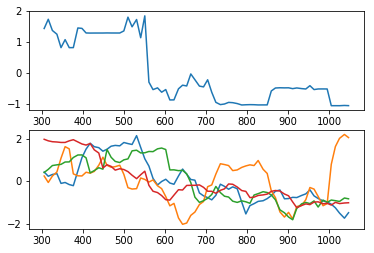

subject 16; gesture 5_1_1; avg 4.50328636331662; sd 0.15368898855877725
subject 16; gesture 5_1_1; PoV: 0.8006065327586203
subject 16; gesture 6_1_1; avg 2.0854572967787925; sd 0.1256850387648904
subject 16; gesture 6_1_1; PoV: 0.6531701820038153
subject 16; gesture 6_0_2; avg 2.4707683521864605; sd 0.14241706560881556
subject 16; gesture 6_0_2; PoV: 0.6868593020529916
subject 16; gesture 3_1_2; avg 2.5784235208246797; sd 0.13422304106412702
subject 16; gesture 3_1_2; PoV: 0.70325660237287


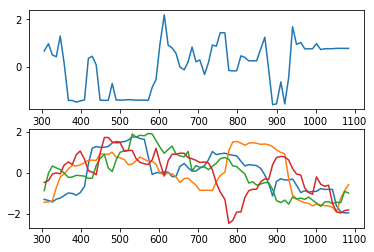

subject 16; gesture 3_1_1; avg 2.7709547588057215; sd 0.14624471214935988
subject 16; gesture 3_1_1; PoV: 0.716974027294006


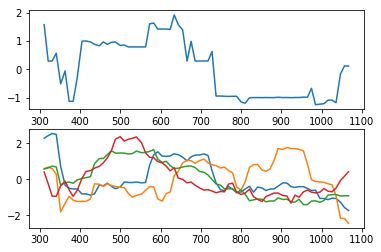

subject 16; gesture 6_0_1; avg 4.011379948954028; sd 0.19749404177445498
subject 16; gesture 6_0_1; PoV: 0.7655633897382366
subject 16; gesture 5_0_1; avg 2.913421979426402; sd 0.14548688844468136
subject 16; gesture 5_0_1; PoV: 0.72265948313335
subject 16; gesture 4_0_2; avg 3.2538966512162206; sd 0.13926928652668277
subject 16; gesture 4_0_2; PoV: 0.7470799669373237
subject 26; gesture 5_0_2; avg 4.90569208797386; sd 0.20317920391820293
subject 26; gesture 5_0_2; PoV: 0.8084047585545903
subject 26; gesture 3_0_1; avg 2.998747562369051; sd 0.15317648577535672
subject 26; gesture 3_0_1; PoV: 0.7232322633478458


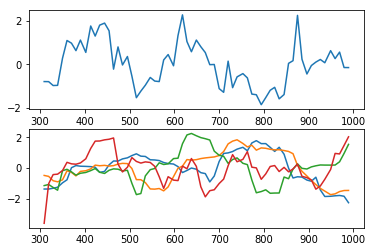

subject 26; gesture 4_1_1; avg 3.331153049617741; sd 0.25983909686996987
subject 26; gesture 4_1_1; PoV: 0.7254362916939533
subject 26; gesture 4_1_2; avg 2.7218886954838704; sd 0.18280344221221942
subject 26; gesture 4_1_2; PoV: 0.7033500357332784
subject 26; gesture 5_1_2; avg 3.9572630820047725; sd 0.1593957551100439
subject 26; gesture 5_1_2; PoV: 0.7737927115892226
subject 26; gesture 6_1_2; avg 4.537543953914147; sd 0.1815483456434316
subject 26; gesture 6_1_2; PoV: 0.7947614330701258
subject 26; gesture 4_0_1; avg 4.578963931123388; sd 0.2774732179509728
subject 26; gesture 4_0_1; PoV: 0.7832074141898802
subject 26; gesture 3_0_2; avg 2.7116956406345496; sd 0.1452721895359991
subject 26; gesture 3_0_2; PoV: 0.712521624996416


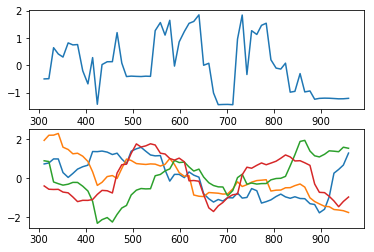

subject 26; gesture 5_1_1; avg 2.8311096690896904; sd 0.14596180505193201
subject 26; gesture 5_1_1; PoV: 0.7223865525816048
subject 26; gesture 6_1_1; avg 5.64788707320874; sd 0.176696632930149
subject 26; gesture 6_1_1; PoV: 0.8321335074161791
subject 26; gesture 6_0_2; avg 4.620468517174083; sd 0.17221235122407047
subject 26; gesture 6_0_2; PoV: 0.8030303633043653
subject 26; gesture 3_1_2; avg 4.256021294734268; sd 0.16091916603325784
subject 26; gesture 3_1_2; PoV: 0.7886983374423906


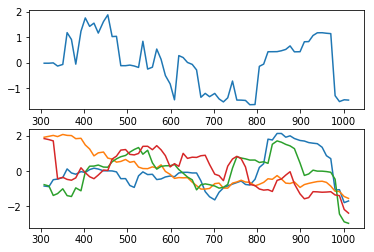

subject 26; gesture 3_1_1; avg 7.878157013473662; sd 0.26083118397964905
subject 26; gesture 3_1_1; PoV: 0.8620735820031326


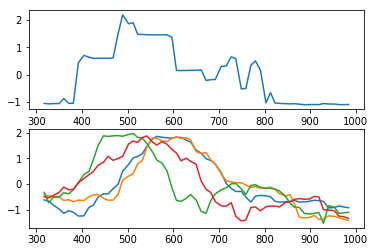

subject 26; gesture 6_0_1; avg 2.4654904627914034; sd 0.14449429000921665
subject 26; gesture 6_0_1; PoV: 0.6914084759851403
subject 26; gesture 5_0_1; avg 3.9805161154844764; sd 0.16308205648947793
subject 26; gesture 5_0_1; PoV: 0.7845491824173184
subject 26; gesture 4_0_2; avg 4.559107946723531; sd 0.2005063770660085
subject 26; gesture 4_0_2; PoV: 0.7929562796180524
subject 32; gesture 5_0_2; avg 2.312392578781426; sd 0.12280826221572866
subject 32; gesture 5_0_2; PoV: 0.6780035895619028
subject 32; gesture 3_0_1; avg 2.243924905711727; sd 0.13672730345687004
subject 32; gesture 3_0_1; PoV: 0.6632775808515514


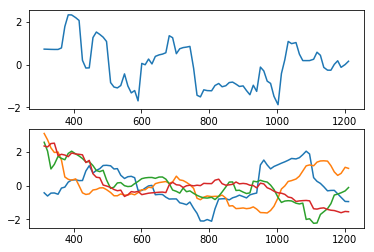

subject 32; gesture 4_1_1; avg 8.368141285171882; sd 0.2603515680434627
subject 32; gesture 4_1_1; PoV: 0.8685005161045813
subject 32; gesture 4_1_2; avg 1.9993387934148994; sd 0.12085847653296973
subject 32; gesture 4_1_2; PoV: 0.6480409844615482
subject 32; gesture 5_1_2; avg 2.9139584690184543; sd 0.13950923167047022
subject 32; gesture 5_1_2; PoV: 0.7255360941779498
subject 32; gesture 6_1_2; avg 2.8378954163574663; sd 0.12285024485879233
subject 32; gesture 6_1_2; PoV: 0.7231220536100433
subject 32; gesture 4_0_1; avg 3.88875590500758; sd 0.15837098584910209
subject 32; gesture 4_0_1; PoV: 0.7685107436486723
subject 32; gesture 3_0_2; avg 3.4561556974336494; sd 0.1566646966497252
subject 32; gesture 3_0_2; PoV: 0.7510003903756953


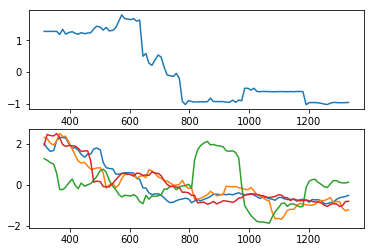

subject 32; gesture 5_1_1; avg 2.2392223973723215; sd 0.15513222082973568
subject 32; gesture 5_1_1; PoV: 0.6688027739020527
subject 32; gesture 6_1_1; avg 3.7388044144968093; sd 0.16104050386195884
subject 32; gesture 6_1_1; PoV: 0.7711560361845698
subject 32; gesture 6_0_2; avg 1.8813022309743654; sd 0.12111404167345569
subject 32; gesture 6_0_2; PoV: 0.6355773928756775
subject 32; gesture 3_1_2; avg 3.264996156027044; sd 0.16501466327479478
subject 32; gesture 3_1_2; PoV: 0.7419554620930103


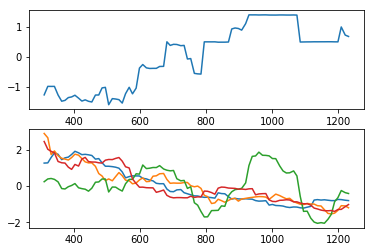

subject 32; gesture 3_1_1; avg 2.3655986622656657; sd 0.1733237188025452
subject 32; gesture 3_1_1; PoV: 0.6736014701015087


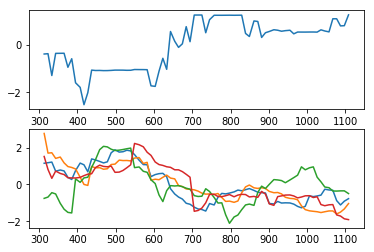

subject 32; gesture 6_0_1; avg 3.0927226001608434; sd 0.13098431964996415
subject 32; gesture 6_0_1; PoV: 0.7404728124789143
subject 32; gesture 5_0_1; avg 2.3012030742734795; sd 0.11868918761680292
subject 32; gesture 5_0_1; PoV: 0.6769336382857103
subject 32; gesture 4_0_2; avg 1.6402141113985385; sd 0.10468505279064691
subject 32; gesture 4_0_2; PoV: 0.6067941984739114
subject 04; gesture 5_0_2; avg 2.9899897708552636; sd 0.1501085390298477
subject 04; gesture 5_0_2; PoV: 0.7351456833530922
subject 04; gesture 3_0_1; avg 2.809162206636479; sd 0.13622637361189538
subject 04; gesture 3_0_1; PoV: 0.7143780961190815


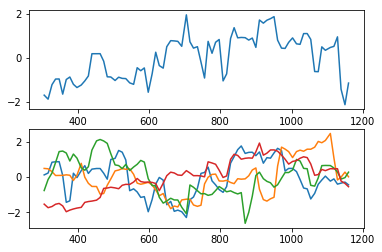

subject 04; gesture 4_1_1; avg 1.851720553255263; sd 0.11585934033127927
subject 04; gesture 4_1_1; PoV: 0.6339765418465109
subject 04; gesture 4_1_2; avg 3.616106660814928; sd 0.158980457464025
subject 04; gesture 4_1_2; PoV: 0.7611073227605655
subject 04; gesture 5_1_2; avg 6.331236760345465; sd 0.16132886988653408
subject 04; gesture 5_1_2; PoV: 0.8502751422229285
subject 04; gesture 6_1_2; avg 3.307985678208713; sd 0.15467621787227392
subject 04; gesture 6_1_2; PoV: 0.7399402129043858
subject 04; gesture 4_0_1; avg 2.9775916268418134; sd 0.14177722049586217
subject 04; gesture 4_0_1; PoV: 0.7274817064500209
subject 04; gesture 3_0_2; avg 3.5585944674783216; sd 0.19260208623191027
subject 04; gesture 3_0_2; PoV: 0.7526241922740438


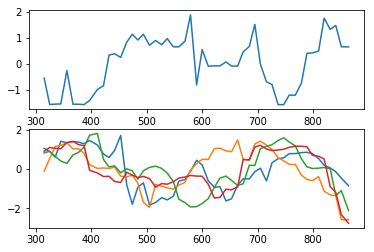

subject 04; gesture 5_1_1; avg 2.6637912170580007; sd 0.1384058346302542
subject 04; gesture 5_1_1; PoV: 0.7009799664280342
subject 04; gesture 6_1_1; avg 2.416260315048634; sd 0.1437658338681983
subject 04; gesture 6_1_1; PoV: 0.6871351354395644
subject 04; gesture 6_0_2; avg 4.56864646464554; sd 0.21491793425478545
subject 04; gesture 6_0_2; PoV: 0.7832202558169337
subject 04; gesture 3_1_2; avg 2.8804377446352323; sd 0.15514373720859095
subject 04; gesture 3_1_2; PoV: 0.719411282289425


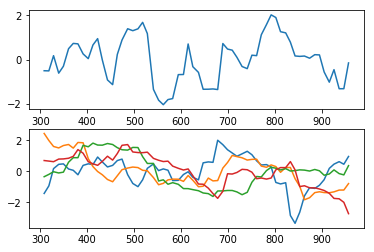

subject 04; gesture 3_1_1; avg 1.8109210050168256; sd 0.11877174658990187
subject 04; gesture 3_1_1; PoV: 0.6306868957609698


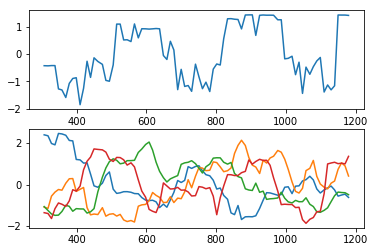

subject 04; gesture 6_0_1; avg 2.2466154065551533; sd 0.12499308121905271
subject 04; gesture 6_0_1; PoV: 0.671207934611087
subject 04; gesture 5_0_1; avg 1.956974411671523; sd 0.11270207596313267
subject 04; gesture 5_0_1; PoV: 0.647031675955769
subject 04; gesture 4_0_2; avg 2.9397947039003633; sd 0.16333996799233258
subject 04; gesture 4_0_2; PoV: 0.7198041662941905
subject 08; gesture 5_0_2; avg 3.151760306394765; sd 0.15484592947826722
subject 08; gesture 5_0_2; PoV: 0.737329000362065
subject 08; gesture 3_0_1; avg 3.6042425972345464; sd 0.16183005263195696
subject 08; gesture 3_0_1; PoV: 0.7633468574397045


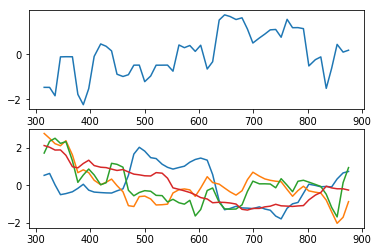

subject 08; gesture 4_1_1; avg 6.047621728094392; sd 0.16743431027517847
subject 08; gesture 4_1_1; PoV: 0.8439137433883358
subject 08; gesture 4_1_2; avg 5.544083226381489; sd 0.20306737750966383
subject 08; gesture 4_1_2; PoV: 0.827580903358075
subject 08; gesture 5_1_2; avg 3.7679924067129256; sd 0.18547541428290548
subject 08; gesture 5_1_2; PoV: 0.7644858929013516
subject 08; gesture 6_1_2; avg 3.8909620460244967; sd 0.18306210018442282
subject 08; gesture 6_1_2; PoV: 0.7665112263643628
subject 08; gesture 4_0_1; avg 3.5032883604754224; sd 0.18584562905641275
subject 08; gesture 4_0_1; PoV: 0.7456620922250365
subject 08; gesture 3_0_2; avg 3.124234628793797; sd 0.1822916465710513
subject 08; gesture 3_0_2; PoV: 0.7272986485712568


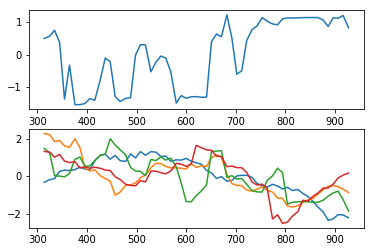

subject 08; gesture 5_1_1; avg 3.0821166103619735; sd 0.14271533259576555
subject 08; gesture 5_1_1; PoV: 0.7414074355543125
subject 08; gesture 6_1_1; avg 4.188488849737179; sd 0.2318513011929846
subject 08; gesture 6_1_1; PoV: 0.7754467395339544
subject 08; gesture 6_0_2; avg 2.4424103033273257; sd 0.13243021367965382
subject 08; gesture 6_0_2; PoV: 0.6882893167792268
subject 08; gesture 3_1_2; avg 8.811871061731669; sd 0.1899857764599633
subject 08; gesture 3_1_2; PoV: 0.8830518594129717


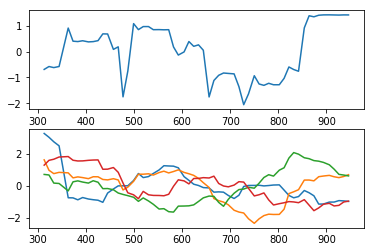

subject 08; gesture 3_1_1; avg 4.07106999952585; sd 0.15353092555226372
subject 08; gesture 3_1_1; PoV: 0.7869910838863062


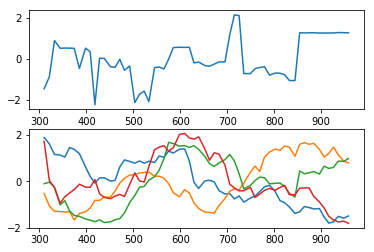

subject 08; gesture 6_0_1; avg 2.821027535807197; sd 0.1547246569278115
subject 08; gesture 6_0_1; PoV: 0.7174947754518219
subject 08; gesture 5_0_1; avg 3.8801788579618095; sd 0.1938057505886584
subject 08; gesture 5_0_1; PoV: 0.7678108728090153
subject 08; gesture 4_0_2; avg 8.398146975662346; sd 0.28265915719793444
subject 08; gesture 4_0_2; PoV: 0.8661432254427394
subject 27; gesture 5_0_2; avg 5.266919148032896; sd 0.17347538117638123
subject 27; gesture 5_0_2; PoV: 0.8175147231275437
subject 27; gesture 3_0_1; avg 5.040174454865534; sd 0.2285866838014936
subject 27; gesture 3_0_1; PoV: 0.8038189495450229


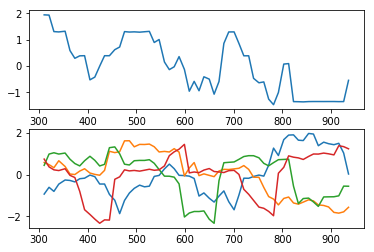

subject 27; gesture 4_1_1; avg 2.528877011284579; sd 0.13980357994638462
subject 27; gesture 4_1_1; PoV: 0.6947424452080679
subject 27; gesture 4_1_2; avg 2.884795592680025; sd 0.19666011074928857
subject 27; gesture 4_1_2; PoV: 0.7111779135094435
subject 27; gesture 5_1_2; avg 5.09541770287105; sd 0.25473976467021686
subject 27; gesture 5_1_2; PoV: 0.8055534153376082
subject 27; gesture 6_1_2; avg 7.156889316557462; sd 0.205140050305108
subject 27; gesture 6_1_2; PoV: 0.8569347825761651
subject 27; gesture 4_0_1; avg 1.9212407489297958; sd 0.1348956509400926
subject 27; gesture 4_0_1; PoV: 0.6339118348310373
subject 27; gesture 3_0_2; avg 6.429718666305493; sd 0.16760743729695632
subject 27; gesture 3_0_2; PoV: 0.8514765749992829


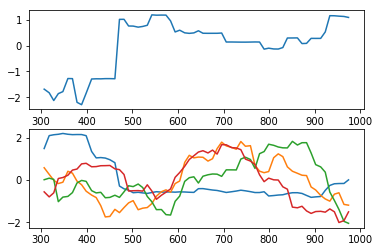

subject 27; gesture 5_1_1; avg 2.743140589241128; sd 0.14299947459309906
subject 27; gesture 5_1_1; PoV: 0.7085283943789741
subject 27; gesture 6_1_1; avg 2.690593839678128; sd 0.15524281880363563
subject 27; gesture 6_1_1; PoV: 0.7067686267359865
subject 27; gesture 6_0_2; avg 2.3454474238847576; sd 0.12890242374848487
subject 27; gesture 6_0_2; PoV: 0.6825017831072663
subject 27; gesture 3_1_2; avg 3.7877613087639377; sd 0.1759227172357961
subject 27; gesture 3_1_2; PoV: 0.7653868810153277


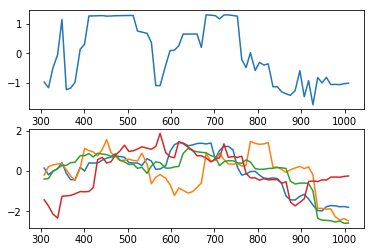

subject 27; gesture 3_1_1; avg 3.3803514263126826; sd 0.14465970563247213
subject 27; gesture 3_1_1; PoV: 0.7534543922288464


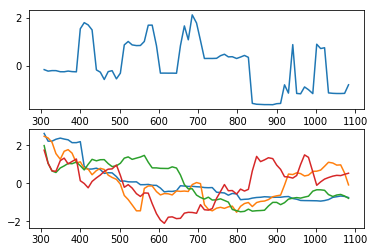

subject 27; gesture 6_0_1; avg 3.3598164972328677; sd 0.2035396743359912
subject 27; gesture 6_0_1; PoV: 0.741434032038568
subject 27; gesture 5_0_1; avg 3.429596134732881; sd 0.1525100878994384
subject 27; gesture 5_0_1; PoV: 0.7546110027587184
subject 27; gesture 4_0_2; avg 4.829431042960159; sd 0.19315781319681974
subject 27; gesture 4_0_2; PoV: 0.8028736856697515
subject 14; gesture 5_0_2; avg 9.793109592428115; sd 0.24475936326701198
subject 14; gesture 5_0_2; PoV: 0.8845894710875513
subject 14; gesture 3_0_1; avg 3.5440775682116112; sd 0.13985942797641318
subject 14; gesture 3_0_1; PoV: 0.7631613937697508


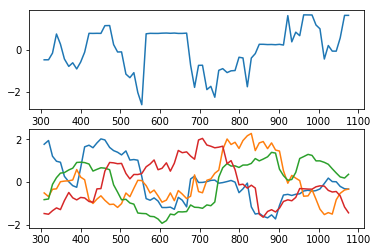

subject 14; gesture 4_1_1; avg 2.57433643828926; sd 0.13706076672609876
subject 14; gesture 4_1_1; PoV: 0.7058838571017236
subject 14; gesture 4_1_2; avg 3.663239338781898; sd 0.23862947264468004
subject 14; gesture 4_1_2; PoV: 0.7494030282549278
subject 14; gesture 5_1_2; avg 2.4561351045174487; sd 0.12498560309655878
subject 14; gesture 5_1_2; PoV: 0.6925483960523225
subject 14; gesture 6_1_2; avg 3.8529771236026185; sd 0.17698419440838672
subject 14; gesture 6_1_2; PoV: 0.7699522964527127
subject 14; gesture 4_0_1; avg 3.393469750094187; sd 0.16785029303969262
subject 14; gesture 4_0_1; PoV: 0.7481455847369536
subject 14; gesture 3_0_2; avg 2.772513788937363; sd 0.1485634081351226
subject 14; gesture 3_0_2; PoV: 0.7213340042331654


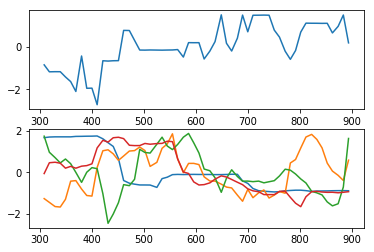

subject 14; gesture 5_1_1; avg 2.737645005876043; sd 0.15191894818266527
subject 14; gesture 5_1_1; PoV: 0.7123373721539678
subject 14; gesture 6_1_1; avg 2.467082786915151; sd 0.15189147496130792
subject 14; gesture 6_1_1; PoV: 0.6896282404036453
subject 14; gesture 6_0_2; avg 2.6320089538594202; sd 0.14167747926550245
subject 14; gesture 6_0_2; PoV: 0.7043343988317871
subject 14; gesture 3_1_2; avg 4.26991313132011; sd 0.1535395711035277
subject 14; gesture 3_1_2; PoV: 0.7955442638306744


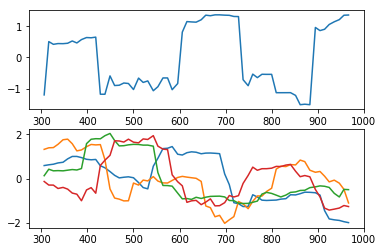

subject 14; gesture 3_1_1; avg 4.333292728284188; sd 0.1756254339936952
subject 14; gesture 3_1_1; PoV: 0.7931296299973732


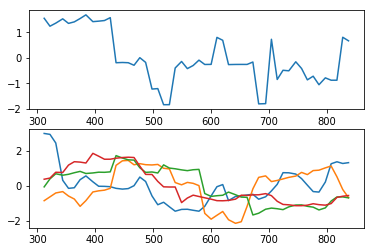

subject 14; gesture 6_0_1; avg 2.862442052604726; sd 0.18751949393676118
subject 14; gesture 6_0_1; PoV: 0.7107930174957127
subject 14; gesture 5_0_1; avg 3.0755564774108786; sd 0.1730642104301157
subject 14; gesture 5_0_1; PoV: 0.7288963308798709
subject 14; gesture 4_0_2; avg 4.105097172964774; sd 0.14012132267823216
subject 14; gesture 4_0_2; PoV: 0.7885994732845713
subject 23; gesture 5_0_2; avg 5.116290582766735; sd 0.1779886277046877
subject 23; gesture 5_0_2; PoV: 0.8174326989984012
subject 23; gesture 3_0_1; avg 5.94584917252744; sd 0.16605599158404277
subject 23; gesture 3_0_1; PoV: 0.8384529948402651


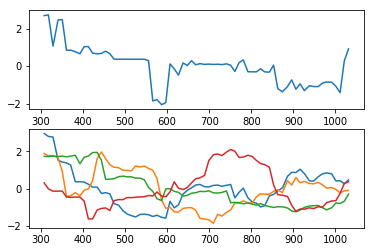

subject 23; gesture 4_1_1; avg 2.1225842064685176; sd 0.12344670314657193
subject 23; gesture 4_1_1; PoV: 0.6622281397297511
subject 23; gesture 4_1_2; avg 2.8274971118734245; sd 0.1382397482017049
subject 23; gesture 4_1_2; PoV: 0.7204616188211554
subject 23; gesture 5_1_2; avg 2.116280182664072; sd 0.13508306625222619
subject 23; gesture 5_1_2; PoV: 0.6597436152356408
subject 23; gesture 6_1_2; avg 3.097214465070346; sd 0.1619873094932889
subject 23; gesture 6_1_2; PoV: 0.7338404736620637
subject 23; gesture 4_0_1; avg 2.16146762258571; sd 0.19662706613765812
subject 23; gesture 4_0_1; PoV: 0.6410095817571971
subject 23; gesture 3_0_2; avg 2.680619957079241; sd 0.13877876302025008
subject 23; gesture 3_0_2; PoV: 0.7088767215993624


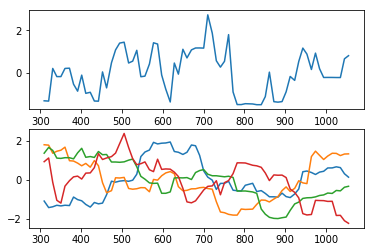

subject 23; gesture 5_1_1; avg 1.8582606245954842; sd 0.11697030817174194
subject 23; gesture 5_1_1; PoV: 0.6327271664327853
subject 23; gesture 6_1_1; avg 3.25634702848783; sd 0.17935302543093623
subject 23; gesture 6_1_1; PoV: 0.7420087940130426
subject 23; gesture 6_0_2; avg 6.400312337764616; sd 0.2036142742071387
subject 23; gesture 6_0_2; PoV: 0.8424436372104553
subject 23; gesture 3_1_2; avg 3.001556977670281; sd 0.1447727296274296
subject 23; gesture 3_1_2; PoV: 0.7303126282821933


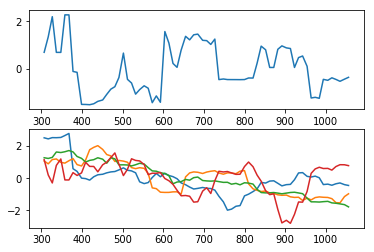

subject 23; gesture 3_1_1; avg 3.987777120201091; sd 0.14095973372404097
subject 23; gesture 3_1_1; PoV: 0.7798003874747079


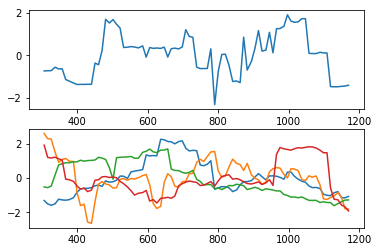

subject 23; gesture 6_0_1; avg 2.314971723185115; sd 0.12913966491439108
subject 23; gesture 6_0_1; PoV: 0.6741479250525287
subject 23; gesture 5_0_1; avg 2.3654736401968885; sd 0.12731714225869892
subject 23; gesture 5_0_1; PoV: 0.6841562385774037
subject 23; gesture 4_0_2; avg 2.2840439678462263; sd 0.13693978770046164
subject 23; gesture 4_0_2; PoV: 0.6741641840269222
subject 25; gesture 5_0_2; avg 3.8409194675174594; sd 0.1487067522675987
subject 25; gesture 5_0_2; PoV: 0.7742806982747507
subject 25; gesture 3_0_1; avg 2.3120416629068554; sd 0.12701713047600205
subject 25; gesture 3_0_1; PoV: 0.6792132083561994


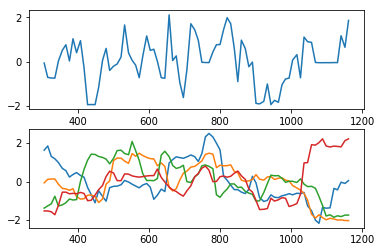

subject 25; gesture 4_1_1; avg 2.6938889488689037; sd 0.14077464782521348
subject 25; gesture 4_1_1; PoV: 0.7093653978680869
subject 25; gesture 4_1_2; avg 4.340106876938368; sd 0.19241692925946222
subject 25; gesture 4_1_2; PoV: 0.7891665138270919
subject 25; gesture 5_1_2; avg 3.639467561766738; sd 0.16218257990591067
subject 25; gesture 5_1_2; PoV: 0.7651184281294231
subject 25; gesture 6_1_2; avg 4.180302998179716; sd 0.1614438183937262
subject 25; gesture 6_1_2; PoV: 0.7911173436067482
subject 25; gesture 4_0_1; avg 2.8778794924972404; sd 0.17552398019765614
subject 25; gesture 4_0_1; PoV: 0.7197254909309345
subject 25; gesture 3_0_2; avg 3.818011097517424; sd 0.17857470492113414
subject 25; gesture 3_0_2; PoV: 0.7668320702932073


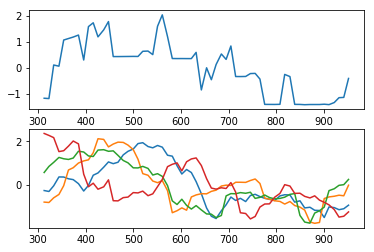

subject 25; gesture 5_1_1; avg 2.7017409021005996; sd 0.16055167665564557
subject 25; gesture 5_1_1; PoV: 0.6989234020952668
subject 25; gesture 6_1_1; avg 3.8343197684219175; sd 0.150657650022612
subject 25; gesture 6_1_1; PoV: 0.7784617030170412
subject 25; gesture 6_0_2; avg 2.8600572497280643; sd 0.14764556860923342
subject 25; gesture 6_0_2; PoV: 0.723240597634575
subject 25; gesture 3_1_2; avg 3.705665184665854; sd 0.15445590561147612
subject 25; gesture 3_1_2; PoV: 0.7712971086320335


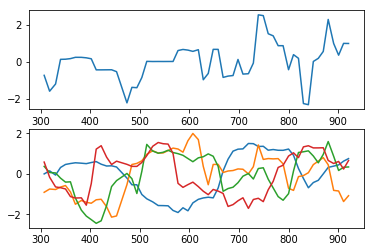

subject 25; gesture 3_1_1; avg 4.082159910554913; sd 0.15644735977158428
subject 25; gesture 3_1_1; PoV: 0.7840109110240587


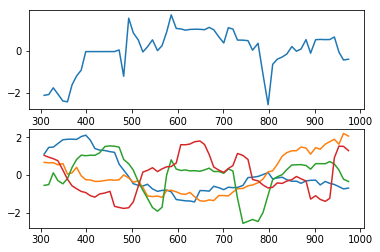

subject 25; gesture 6_0_1; avg 3.6781345251840922; sd 0.14231514776053739
subject 25; gesture 6_0_1; PoV: 0.7700687337624536
subject 25; gesture 5_0_1; avg 4.03535445705517; sd 0.16152577707372104
subject 25; gesture 5_0_1; PoV: 0.774229087715776
subject 25; gesture 4_0_2; avg 2.9047298680086717; sd 0.15914983612427014
subject 25; gesture 4_0_2; PoV: 0.7211136644347058
subject 18; gesture 5_0_2; avg 3.1452270495861323; sd 0.14558835597718506
subject 18; gesture 5_0_2; PoV: 0.7427590782703446
subject 18; gesture 3_0_1; avg 4.091161102925885; sd 0.15999461096771198
subject 18; gesture 3_0_1; PoV: 0.7844308480226905


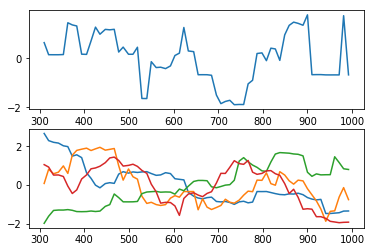

subject 18; gesture 4_1_1; avg 2.553181459366886; sd 0.15125845443260177
subject 18; gesture 4_1_1; PoV: 0.695731123825279
subject 18; gesture 4_1_2; avg 3.9951078321903584; sd 0.169608182346621
subject 18; gesture 4_1_2; PoV: 0.7691429088234546
subject 18; gesture 5_1_2; avg 4.522904705834871; sd 0.15902983991353714
subject 18; gesture 5_1_2; PoV: 0.8004085964667609
subject 18; gesture 6_1_2; avg 2.1961571304858296; sd 0.13531861073561463
subject 18; gesture 6_1_2; PoV: 0.6665425248278274
subject 18; gesture 4_0_1; avg 2.0882758270697104; sd 0.130410820094385
subject 18; gesture 4_0_1; PoV: 0.6590974803471144
subject 18; gesture 3_0_2; avg 4.348154438301888; sd 0.18759378864444418
subject 18; gesture 3_0_2; PoV: 0.7903562864218951


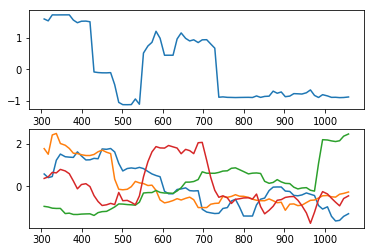

subject 18; gesture 5_1_1; avg 3.0781324569109403; sd 0.1416963080720185
subject 18; gesture 5_1_1; PoV: 0.735561337633818
subject 18; gesture 6_1_1; avg 1.8576986438783099; sd 0.12156638101968842
subject 18; gesture 6_1_1; PoV: 0.6341636692775783
subject 18; gesture 6_0_2; avg 2.1827165751026283; sd 0.12909549699759157
subject 18; gesture 6_0_2; PoV: 0.6692999755088406
subject 18; gesture 3_1_2; avg 2.1862106989124657; sd 0.12205235681396712
subject 18; gesture 3_1_2; PoV: 0.6704298373698885


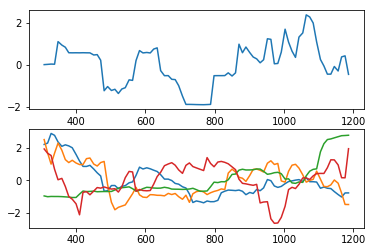

subject 18; gesture 3_1_1; avg 2.2566887791844916; sd 0.1038703921513431
subject 18; gesture 3_1_1; PoV: 0.6747725280882865


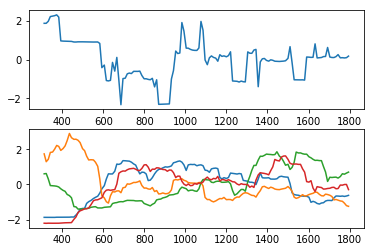

subject 18; gesture 6_0_1; avg 2.101305981800403; sd 0.12456296412846217
subject 18; gesture 6_0_1; PoV: 0.6631524832186643
subject 18; gesture 5_0_1; avg 3.216835171723888; sd 0.14581240769240272
subject 18; gesture 5_0_1; PoV: 0.7457140184279333
subject 18; gesture 4_0_2; avg 3.428671850222598; sd 0.1519810286731755
subject 18; gesture 4_0_2; PoV: 0.751369848596371
subject 29; gesture 5_0_2; avg 2.350287908421563; sd 0.1229963478254038
subject 29; gesture 5_0_2; PoV: 0.6867790201303462
subject 29; gesture 3_0_1; avg 2.1347936256909588; sd 0.11767984413808708
subject 29; gesture 3_0_1; PoV: 0.6666700848711762


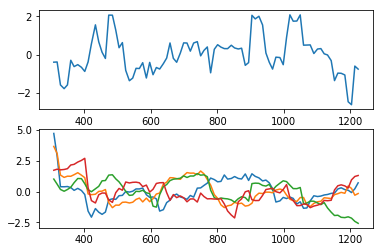

subject 29; gesture 4_1_1; avg 4.422002858579728; sd 0.1687792648946008
subject 29; gesture 4_1_1; PoV: 0.7949199795626003
subject 29; gesture 4_1_2; avg 3.223073595041914; sd 0.15071535021103621
subject 29; gesture 4_1_2; PoV: 0.7410293069610524
subject 29; gesture 5_1_2; avg 3.6816364484582365; sd 0.16556826593306254
subject 29; gesture 5_1_2; PoV: 0.7594167450962962
subject 29; gesture 6_1_2; avg 3.119507257643455; sd 0.13723873825984606
subject 29; gesture 6_1_2; PoV: 0.7415428279120332
subject 29; gesture 4_0_1; avg 3.4117015721038615; sd 0.16419168447380764
subject 29; gesture 4_0_1; PoV: 0.7464162889257124
subject 29; gesture 3_0_2; avg 2.755390916728497; sd 0.14356579069458886
subject 29; gesture 3_0_2; PoV: 0.713859682472811


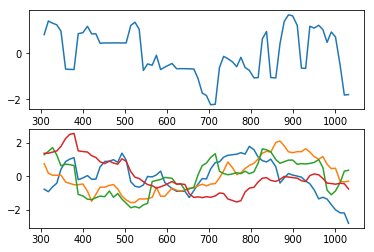

subject 29; gesture 5_1_1; avg 2.2598941054634456; sd 0.14208997285050232
subject 29; gesture 5_1_1; PoV: 0.6659423718188862
subject 29; gesture 6_1_1; avg 2.9998128568508284; sd 0.15372918699903343
subject 29; gesture 6_1_1; PoV: 0.7257648260296525
subject 29; gesture 6_0_2; avg 3.9542916854039194; sd 0.1386737671903116
subject 29; gesture 6_0_2; PoV: 0.7833240941810317
subject 29; gesture 3_1_2; avg 4.627885129667794; sd 0.16878405940830962
subject 29; gesture 3_1_2; PoV: 0.8014857573025888


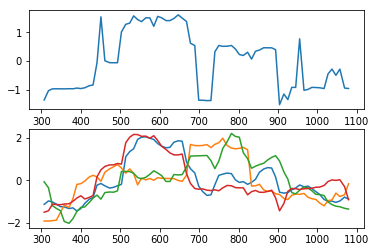

subject 29; gesture 3_1_1; avg 2.827719453297716; sd 0.1362547351057309
subject 29; gesture 3_1_1; PoV: 0.7210023884818584


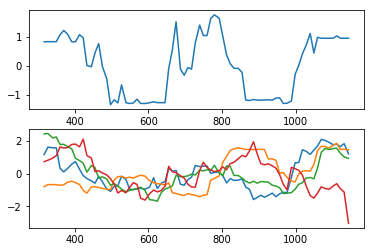

subject 29; gesture 6_0_1; avg 2.3734224833277575; sd 0.14158666057164357
subject 29; gesture 6_0_1; PoV: 0.6755825456082976
subject 29; gesture 5_0_1; avg 5.2190490010464305; sd 0.1755102758147854
subject 29; gesture 5_0_1; PoV: 0.8197280937838775
subject 29; gesture 4_0_2; avg 2.8291092278969483; sd 0.15174451150821036
subject 29; gesture 4_0_2; PoV: 0.7156604690346451
subject 15; gesture 5_0_2; avg 6.377185269562899; sd 0.17579759273212497
subject 15; gesture 5_0_2; PoV: 0.8532843067806412
subject 15; gesture 3_0_1; avg 3.2977297566152375; sd 0.15696822273140024
subject 15; gesture 3_0_1; PoV: 0.746787827195901


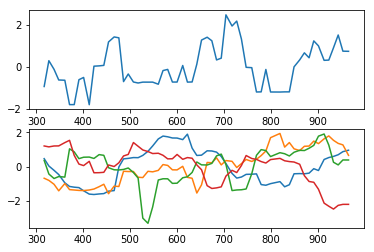

subject 15; gesture 4_1_1; avg 3.6305523835612448; sd 0.20248908297794604
subject 15; gesture 4_1_1; PoV: 0.7515823497909008
subject 15; gesture 4_1_2; avg 2.3912073008376664; sd 0.12873091266242345
subject 15; gesture 4_1_2; PoV: 0.6864893165162151
subject 15; gesture 5_1_2; avg 2.838316042536746; sd 0.14306309149851434
subject 15; gesture 5_1_2; PoV: 0.7222167746671043
subject 15; gesture 6_1_2; avg 2.7294067823505643; sd 0.14770531404187326
subject 15; gesture 6_1_2; PoV: 0.7107301652764478
subject 15; gesture 4_0_1; avg 3.7965082099771488; sd 0.1609025471347219
subject 15; gesture 4_0_1; PoV: 0.7664347574331603
subject 15; gesture 3_0_2; avg 2.5626077692466405; sd 0.14055189623497263
subject 15; gesture 3_0_2; PoV: 0.6964394367057577


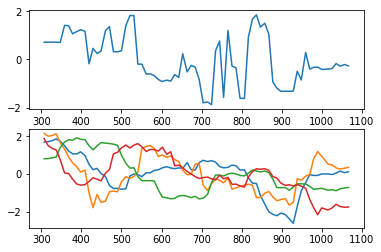

subject 15; gesture 5_1_1; avg 3.284343860583036; sd 0.15539194551483435
subject 15; gesture 5_1_1; PoV: 0.7441269991074178
subject 15; gesture 6_1_1; avg 3.498643788532457; sd 0.16973052933759877
subject 15; gesture 6_1_1; PoV: 0.7519762122743521
subject 15; gesture 6_0_2; avg 2.2800086228180807; sd 0.13070579861821519
subject 15; gesture 6_0_2; PoV: 0.6795145973941019
subject 15; gesture 3_1_2; avg 2.7247620524700515; sd 0.14297709028462824
subject 15; gesture 3_1_2; PoV: 0.7120178260178414


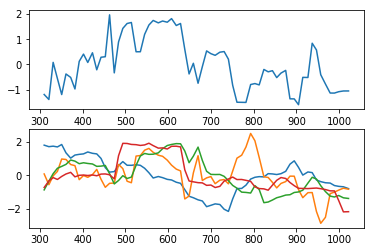

subject 15; gesture 3_1_1; avg 3.7522896604735423; sd 0.16638182548281796
subject 15; gesture 3_1_1; PoV: 0.7639767881974514


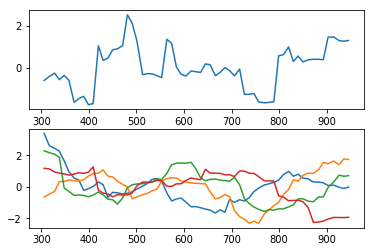

subject 15; gesture 6_0_1; avg 2.1308205443504566; sd 0.1137951718151407
subject 15; gesture 6_0_1; PoV: 0.6647903803221522
subject 15; gesture 5_0_1; avg 2.946523864609246; sd 0.13251722663400542
subject 15; gesture 5_0_1; PoV: 0.7318878126406804
subject 15; gesture 4_0_2; avg 3.0231245253792154; sd 0.17170483678603596
subject 15; gesture 4_0_2; PoV: 0.7207306061699161
subject 28; gesture 5_0_2; avg 7.314649357236653; sd 0.2302528573442612
subject 28; gesture 5_0_2; PoV: 0.8577084474353577
subject 28; gesture 3_0_1; avg 3.926953828813714; sd 0.17347181372262846
subject 28; gesture 3_0_1; PoV: 0.7859507781679013


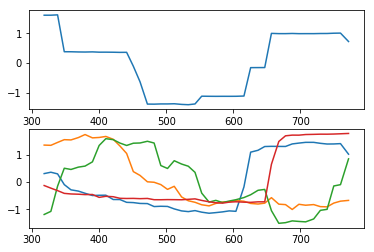

subject 28; gesture 4_1_1; avg 3.2062623903561707; sd 0.15838809188898756
subject 28; gesture 4_1_1; PoV: 0.7431155722158065
subject 28; gesture 4_1_2; avg 5.099137594954269; sd 0.19061065903180766
subject 28; gesture 4_1_2; PoV: 0.8143041550986667
subject 28; gesture 5_1_2; avg 4.424882385408591; sd 0.18858171976795396
subject 28; gesture 5_1_2; PoV: 0.7959469798781367
subject 28; gesture 6_1_2; avg 3.7369209535515537; sd 0.18026031682991642
subject 28; gesture 6_1_2; PoV: 0.7618026411749418
subject 28; gesture 4_0_1; avg 3.866750003526688; sd 0.169638701939353
subject 28; gesture 4_0_1; PoV: 0.7767179014403252
subject 28; gesture 3_0_2; avg 2.5361079533999558; sd 0.14151135672666573
subject 28; gesture 3_0_2; PoV: 0.7018298494770752


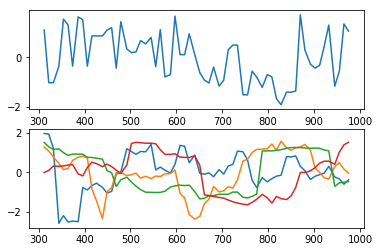

subject 28; gesture 5_1_1; avg 3.346642467230048; sd 0.16147061332741794
subject 28; gesture 5_1_1; PoV: 0.7541268718862627
subject 28; gesture 6_1_1; avg 3.9601485896300277; sd 0.20581598524877526
subject 28; gesture 6_1_1; PoV: 0.7640364797209007
subject 28; gesture 6_0_2; avg 2.677674762444211; sd 0.1510834041018318
subject 28; gesture 6_0_2; PoV: 0.7089402069629201
subject 28; gesture 3_1_2; avg 6.110206664065919; sd 0.20249454263251274
subject 28; gesture 3_1_2; PoV: 0.8418076596583407


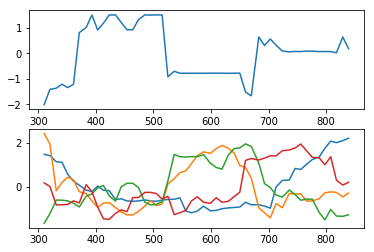

subject 28; gesture 3_1_1; avg 4.3372463100845815; sd 0.1709724111810701
subject 28; gesture 3_1_1; PoV: 0.7955607530543753


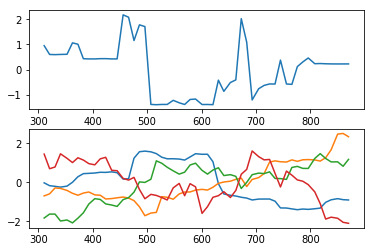

subject 28; gesture 6_0_1; avg 5.433103755402076; sd 0.17913983925556068
subject 28; gesture 6_0_1; PoV: 0.8264224482627128
subject 28; gesture 5_0_1; avg 4.145297944766442; sd 0.17142088973721442
subject 28; gesture 5_0_1; PoV: 0.7872801902469206
subject 28; gesture 4_0_2; avg 3.9767911231639186; sd 0.16964330554119825
subject 28; gesture 4_0_2; PoV: 0.778531353852068
subject 12; gesture 5_0_2; avg 2.6600559720422177; sd 0.14509177621037767
subject 12; gesture 5_0_2; PoV: 0.7054452102644572
subject 12; gesture 3_0_1; avg 3.422028543866741; sd 0.1596351289958524
subject 12; gesture 3_0_1; PoV: 0.7496578377330504


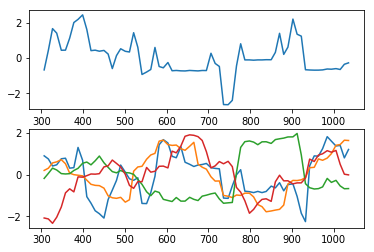

subject 12; gesture 4_1_1; avg 4.139275523319834; sd 0.1656618749843641
subject 12; gesture 4_1_1; PoV: 0.7822852060310805
subject 12; gesture 4_1_2; avg 2.5396747097372194; sd 0.13086449993197247
subject 12; gesture 4_1_2; PoV: 0.7026266710402687
subject 12; gesture 5_1_2; avg 2.66162505596158; sd 0.14071896544048962
subject 12; gesture 5_1_2; PoV: 0.7037634763628812
subject 12; gesture 6_1_2; avg 2.054751745718579; sd 0.13124380377887024
subject 12; gesture 6_1_2; PoV: 0.6529370761629081
subject 12; gesture 4_0_1; avg 1.8959295470053368; sd 0.1274028132470022
subject 12; gesture 4_0_1; PoV: 0.6401775962015048
subject 12; gesture 3_0_2; avg 3.407748583430471; sd 0.16739827223486148
subject 12; gesture 3_0_2; PoV: 0.7412694529963925


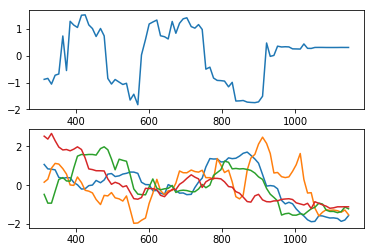

subject 12; gesture 5_1_1; avg 2.9982253517013024; sd 0.14007542399811598
subject 12; gesture 5_1_1; PoV: 0.7330833404781799
subject 12; gesture 6_1_1; avg 3.5041429120560705; sd 0.1415475544977332
subject 12; gesture 6_1_1; PoV: 0.7642237542533424
subject 12; gesture 6_0_2; avg 2.7266293182895107; sd 0.13359514423966712
subject 12; gesture 6_0_2; PoV: 0.7128246737857736
subject 12; gesture 3_1_2; avg 2.097078186309241; sd 0.12650169730212477
subject 12; gesture 3_1_2; PoV: 0.6639631579789007


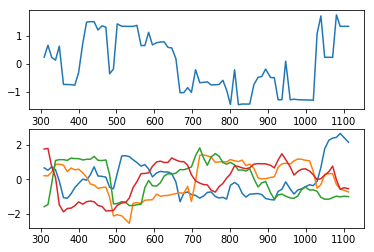

subject 12; gesture 3_1_1; avg 2.824296783179108; sd 0.13285572968034903
subject 12; gesture 3_1_1; PoV: 0.7233362496140636


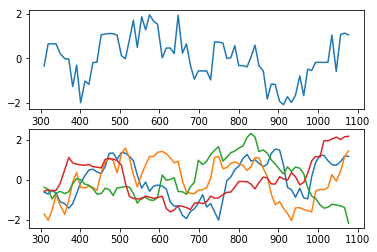

subject 12; gesture 6_0_1; avg 2.02079918365758; sd 0.12259894795031535
subject 12; gesture 6_0_1; PoV: 0.6541701659652405
subject 12; gesture 5_0_1; avg 1.9527734514560167; sd 0.12908912765805952
subject 12; gesture 5_0_1; PoV: 0.635913075679609
subject 12; gesture 4_0_2; avg 6.019876644155983; sd 0.1827336592986645
subject 12; gesture 4_0_2; PoV: 0.8402441612897497
subject 19; gesture 5_0_2; avg 2.6394793648639987; sd 0.1426166360521453
subject 19; gesture 5_0_2; PoV: 0.7068863597341333
subject 19; gesture 3_0_1; avg 3.6698547813701023; sd 0.1476589111186243
subject 19; gesture 3_0_1; PoV: 0.768649242654625


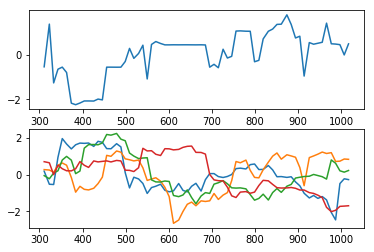

subject 19; gesture 4_1_1; avg 2.190583437019551; sd 0.1363336737822586
subject 19; gesture 4_1_1; PoV: 0.6649100071181355
subject 19; gesture 4_1_2; avg 2.338154862127737; sd 0.13955129088164614
subject 19; gesture 4_1_2; PoV: 0.6759775460697461
subject 19; gesture 5_1_2; avg 2.2141783431858273; sd 0.13228485437938683
subject 19; gesture 5_1_2; PoV: 0.6681297704833123
subject 19; gesture 6_1_2; avg 3.6110098805156707; sd 0.15928387479641173
subject 19; gesture 6_1_2; PoV: 0.7614087990676461
subject 19; gesture 4_0_1; avg 6.577399114460823; sd 0.2106321244733739
subject 19; gesture 4_0_1; PoV: 0.8436381920940381
subject 19; gesture 3_0_2; avg 3.879962641729481; sd 0.1476952395923493
subject 19; gesture 3_0_2; PoV: 0.7812674926682968


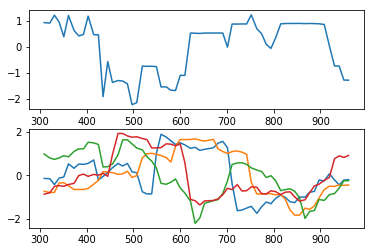

subject 19; gesture 5_1_1; avg 2.2710894595333455; sd 0.1278541322599668
subject 19; gesture 5_1_1; PoV: 0.680134467533895
subject 19; gesture 6_1_1; avg 2.542804599782683; sd 0.13524122733854188
subject 19; gesture 6_1_1; PoV: 0.6994179695652267
subject 19; gesture 6_0_2; avg 2.126277852893211; sd 0.13356668206036973
subject 19; gesture 6_0_2; PoV: 0.6589665750654595
subject 19; gesture 3_1_2; avg 2.88374926674015; sd 0.14311068981785818
subject 19; gesture 3_1_2; PoV: 0.723732934971475


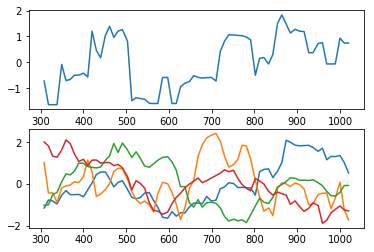

subject 19; gesture 3_1_1; avg 2.410069591230768; sd 0.1209814518164972
subject 19; gesture 3_1_1; PoV: 0.6927368983889468


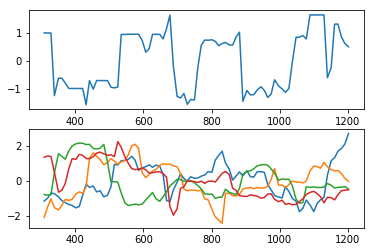

subject 19; gesture 6_0_1; avg 2.677335124570565; sd 0.131261126601981
subject 19; gesture 6_0_1; PoV: 0.7112638828348455
subject 19; gesture 5_0_1; avg 2.8892733469207896; sd 0.12871831167269215
subject 19; gesture 5_0_1; PoV: 0.7227781727482417
subject 19; gesture 4_0_2; avg 3.333328166503951; sd 0.13776257094047598
subject 19; gesture 4_0_2; PoV: 0.7519882445023324
subject 07; gesture 5_0_2; avg 3.3021968305252685; sd 0.1549815690541248
subject 07; gesture 5_0_2; PoV: 0.7431182909807379
subject 07; gesture 3_0_1; avg 2.981644128127131; sd 0.12829074575182664
subject 07; gesture 3_0_1; PoV: 0.7351248810127465


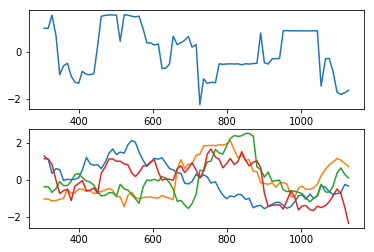

subject 07; gesture 4_1_1; avg 2.6905405211148077; sd 0.13547698801457753
subject 07; gesture 4_1_1; PoV: 0.7056852891814083
subject 07; gesture 4_1_2; avg 1.5874776182048744; sd 0.10188858740982659
subject 07; gesture 4_1_2; PoV: 0.5995314336337778
subject 07; gesture 5_1_2; avg 1.9737659350176386; sd 0.1153652451486146
subject 07; gesture 5_1_2; PoV: 0.6470596441724211
subject 07; gesture 6_1_2; avg 1.6385726549259916; sd 0.10893251616205314
subject 07; gesture 6_1_2; PoV: 0.6052769422282562
subject 07; gesture 4_0_1; avg 1.8438489168283172; sd 0.11433021111381927
subject 07; gesture 4_0_1; PoV: 0.6348481257502194
subject 07; gesture 3_0_2; avg 1.816070421451638; sd 0.11649651826497094
subject 07; gesture 3_0_2; PoV: 0.6301534967738496


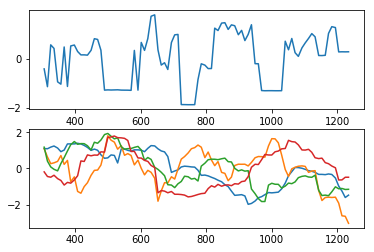

subject 07; gesture 5_1_1; avg 2.4402253843851454; sd 0.12809154604079434
subject 07; gesture 5_1_1; PoV: 0.6914120424907835
subject 07; gesture 6_1_1; avg 1.881581816128947; sd 0.12310934723365984
subject 07; gesture 6_1_1; PoV: 0.630976200488085
subject 07; gesture 6_0_2; avg 1.9089296379960856; sd 0.11382197499315586
subject 07; gesture 6_0_2; PoV: 0.6416961541564085
subject 07; gesture 3_1_2; avg 2.464022481411181; sd 0.13865078579268625
subject 07; gesture 3_1_2; PoV: 0.6892361948105955


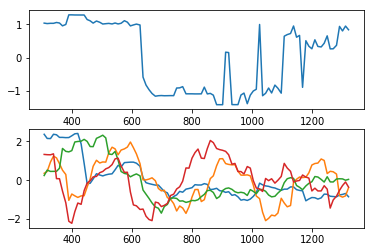

subject 07; gesture 3_1_1; avg 2.018193208822693; sd 0.12967863604846638
subject 07; gesture 3_1_1; PoV: 0.6502691526940465


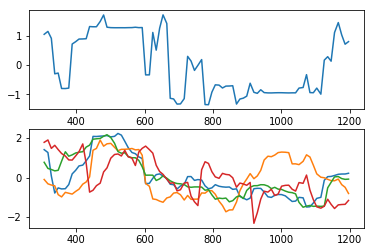

subject 07; gesture 6_0_1; avg 3.1741316097817345; sd 0.13246184735004427
subject 07; gesture 6_0_1; PoV: 0.7389187059868776
subject 07; gesture 5_0_1; avg 1.9216690311934368; sd 0.12421756264113858
subject 07; gesture 5_0_1; PoV: 0.6360217973621075
subject 07; gesture 4_0_2; avg 2.1147682935507754; sd 0.12887133542940415
subject 07; gesture 4_0_2; PoV: 0.6616425441590185
subject 20; gesture 5_0_2; avg 4.438079967261123; sd 0.15847244097711216
subject 20; gesture 5_0_2; PoV: 0.7971377044144542
subject 20; gesture 3_0_1; avg 2.25915300518653; sd 0.13682100770517353
subject 20; gesture 3_0_1; PoV: 0.674846103071416


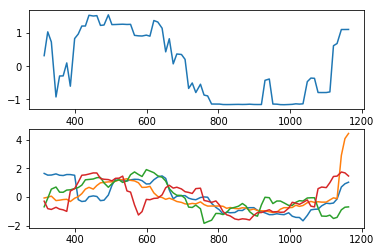

subject 20; gesture 4_1_1; avg 2.763537659521738; sd 0.1477150493991921
subject 20; gesture 4_1_1; PoV: 0.7105664085747203
subject 20; gesture 4_1_2; avg 3.457308410598847; sd 0.18351793953194306
subject 20; gesture 4_1_2; PoV: 0.7478807116608891
subject 20; gesture 5_1_2; avg 2.408917959469821; sd 0.1460192220882311
subject 20; gesture 5_1_2; PoV: 0.6859098381644604
subject 20; gesture 6_1_2; avg 2.333955721134759; sd 0.13688176666936153
subject 20; gesture 6_1_2; PoV: 0.6799204929632368
subject 20; gesture 4_0_1; avg 2.1220231270193852; sd 0.11526782220157135
subject 20; gesture 4_0_1; PoV: 0.6659366467723086
subject 20; gesture 3_0_2; avg 2.709955543673723; sd 0.14204062024498662
subject 20; gesture 3_0_2; PoV: 0.7147356121399983


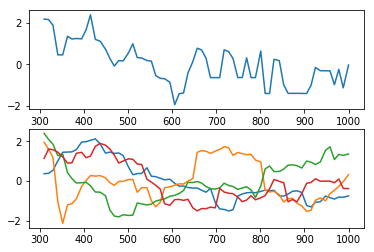

subject 20; gesture 5_1_1; avg 4.121012858905055; sd 0.1525325110234709
subject 20; gesture 5_1_1; PoV: 0.7876404763875545
subject 20; gesture 6_1_1; avg 3.594601079656033; sd 0.14504314710379576
subject 20; gesture 6_1_1; PoV: 0.7654087923869218
subject 20; gesture 6_0_2; avg 2.7959086820712753; sd 0.13125952687299228
subject 20; gesture 6_0_2; PoV: 0.721777255019129
subject 20; gesture 3_1_2; avg 2.945070155156206; sd 0.14945932697465122
subject 20; gesture 3_1_2; PoV: 0.7291130054196869


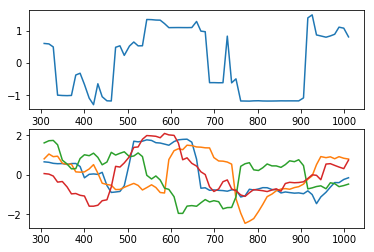

subject 20; gesture 3_1_1; avg 4.202904218273781; sd 0.14805162537506558
subject 20; gesture 3_1_1; PoV: 0.7935138032727345


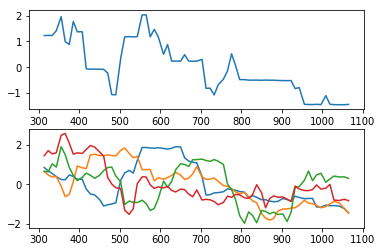

subject 20; gesture 6_0_1; avg 2.9866028299222926; sd 0.1395829042958904
subject 20; gesture 6_0_1; PoV: 0.7287773562126532
subject 20; gesture 5_0_1; avg 2.415390249753362; sd 0.13454145653007546
subject 20; gesture 5_0_1; PoV: 0.6899927795564762
subject 20; gesture 4_0_2; avg 3.5269846611125923; sd 0.1731991373010118
subject 20; gesture 4_0_2; PoV: 0.7485970867517462
subject 31; gesture 5_0_2; avg 3.331181769777097; sd 0.167739012592506
subject 31; gesture 5_0_2; PoV: 0.7499522657145373
subject 31; gesture 3_0_1; avg 3.869269726751088; sd 0.14773029869865492
subject 31; gesture 3_0_1; PoV: 0.7729327942301453


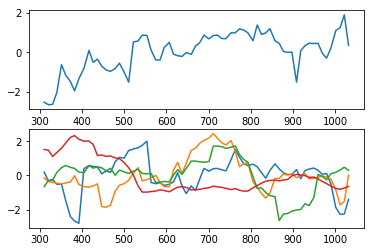

subject 31; gesture 4_1_1; avg 4.468067672906017; sd 0.17818104735332596
subject 31; gesture 4_1_1; PoV: 0.7953962064291644
subject 31; gesture 4_1_2; avg 2.593500821598344; sd 0.180432064991232
subject 31; gesture 4_1_2; PoV: 0.6934486849261099
subject 31; gesture 5_1_2; avg 2.863827879763655; sd 0.17025051672630184
subject 31; gesture 5_1_2; PoV: 0.716571350498708
subject 31; gesture 6_1_2; avg 2.930731272345848; sd 0.16030825575271485
subject 31; gesture 6_1_2; PoV: 0.7244091222343648
subject 31; gesture 4_0_1; avg 2.569819784926396; sd 0.14865957239091537
subject 31; gesture 4_0_1; PoV: 0.6997510802153242
subject 31; gesture 3_0_2; avg 3.583059205508947; sd 0.16428619653185578
subject 31; gesture 3_0_2; PoV: 0.7631707038758492


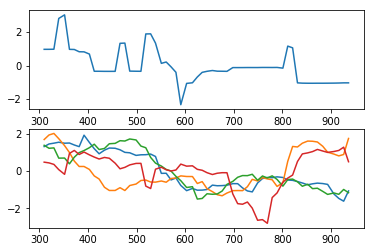

subject 31; gesture 5_1_1; avg 4.099650001545774; sd 0.1625525620143957
subject 31; gesture 5_1_1; PoV: 0.7853168329369481
subject 31; gesture 6_1_1; avg 3.2233239686025743; sd 0.19550084736232404
subject 31; gesture 6_1_1; PoV: 0.7302470756379577
subject 31; gesture 6_0_2; avg 3.415454608709602; sd 0.1803835599207422
subject 31; gesture 6_0_2; PoV: 0.7512418823852353
subject 31; gesture 3_1_2; avg 4.241091958469291; sd 0.16340237963367577
subject 31; gesture 3_1_2; PoV: 0.7931651806070591


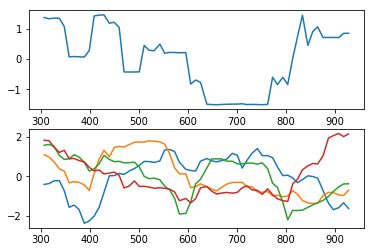

subject 31; gesture 3_1_1; avg 3.3138649127901663; sd 0.16541124870652546
subject 31; gesture 3_1_1; PoV: 0.7461001713846512


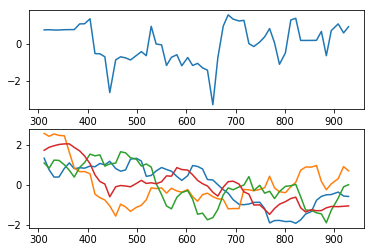

subject 31; gesture 6_0_1; avg 4.146299086737311; sd 0.1864473872737925
subject 31; gesture 6_0_1; PoV: 0.7785586951760446
subject 31; gesture 5_0_1; avg 2.9820297634915485; sd 0.14674990586334105
subject 31; gesture 5_0_1; PoV: 0.7306830205407887
subject 31; gesture 4_0_2; avg 3.192675437077024; sd 0.21216773893301247
subject 31; gesture 4_0_2; PoV: 0.7269399390949665
subject 13; gesture 5_0_2; avg 1.4775096523030795; sd 0.10194490826742002
subject 13; gesture 5_0_2; PoV: 0.5810364699674261
subject 13; gesture 3_0_1; avg 2.357588908747432; sd 0.12661048824767654
subject 13; gesture 3_0_1; PoV: 0.6810162709246094


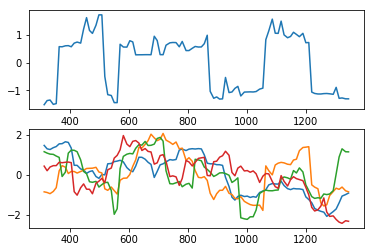

subject 13; gesture 4_1_1; avg 1.804732277460996; sd 0.12078258928581878
subject 13; gesture 4_1_1; PoV: 0.6224169414767484
subject 13; gesture 4_1_2; avg 1.48355665251278; sd 0.09304629609759285
subject 13; gesture 4_1_2; PoV: 0.5867931366925392
subject 13; gesture 5_1_2; avg 1.5281098264531086; sd 0.10308089310862688
subject 13; gesture 5_1_2; PoV: 0.5889024861479288
subject 13; gesture 6_1_2; avg 1.3962782258350528; sd 0.0924191786546178
subject 13; gesture 6_1_2; PoV: 0.5697101494160339
subject 13; gesture 4_0_1; avg 1.2376984726099085; sd 0.09617777007520809
subject 13; gesture 4_0_1; PoV: 0.5383709081308858
subject 13; gesture 3_0_2; avg 1.4949949658182318; sd 0.10231745463134155
subject 13; gesture 3_0_2; PoV: 0.5858166851387946


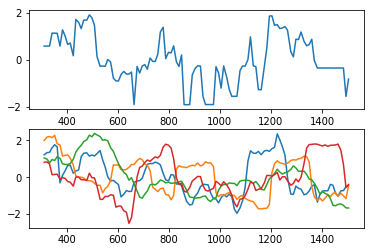

subject 13; gesture 5_1_1; avg 2.2228321681931154; sd 0.1109916117306033
subject 13; gesture 5_1_1; PoV: 0.6715223073664067
subject 13; gesture 6_1_1; avg 1.3892164954752382; sd 0.10039754185413982
subject 13; gesture 6_1_1; PoV: 0.5680420159630103
subject 13; gesture 6_0_2; avg 1.0299825512741865; sd 0.08771071525613396
subject 13; gesture 6_0_2; PoV: 0.49959054170926637
subject 13; gesture 3_1_2; avg 1.0564669473176815; sd 0.09286449533255885
subject 13; gesture 3_1_2; PoV: 0.4998821021290108


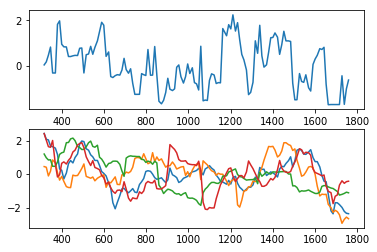

subject 13; gesture 3_1_1; avg 1.463438662774354; sd 0.10530841455132077
subject 13; gesture 3_1_1; PoV: 0.5762131225445862


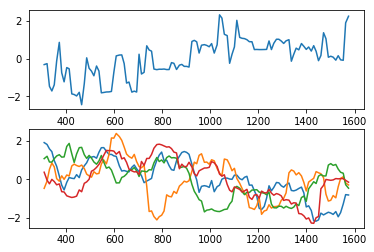

subject 13; gesture 6_0_1; avg 1.587477233324705; sd 0.11693879845353668
subject 13; gesture 6_0_1; PoV: 0.5931549166899789
subject 13; gesture 5_0_1; avg 1.514409166964473; sd 0.10470772606853257
subject 13; gesture 5_0_1; PoV: 0.5875020818376187
subject 13; gesture 4_0_2; avg 2.1232513088743996; sd 0.11764940195019313
subject 13; gesture 4_0_2; PoV: 0.6608253502998249
subject 36; gesture 5_0_2; avg 3.270289852554333; sd 0.26230456643017613
subject 36; gesture 5_0_2; PoV: 0.7181757532570711
subject 36; gesture 3_0_1; avg 4.114134777314289; sd 0.1731384827422577
subject 36; gesture 3_0_1; PoV: 0.7777461014463356


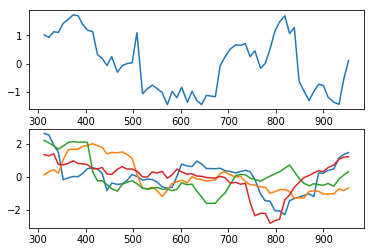

subject 36; gesture 4_1_1; avg 4.689843944992674; sd 0.29531019451513885
subject 36; gesture 4_1_1; PoV: 0.7839614477519686
subject 36; gesture 4_1_2; avg 4.637027158443557; sd 0.250822307838122
subject 36; gesture 4_1_2; PoV: 0.7846455111789836
subject 36; gesture 5_1_2; avg 2.95312639955975; sd 0.18093277189510223
subject 36; gesture 5_1_2; PoV: 0.7131975719835588
subject 36; gesture 6_1_2; avg 3.4867948571170073; sd 0.16201787020757175
subject 36; gesture 6_1_2; PoV: 0.7518140304539711
subject 36; gesture 4_0_1; avg 4.345307491725453; sd 0.2026706800003288
subject 36; gesture 4_0_1; PoV: 0.7791542243688767
subject 36; gesture 3_0_2; avg 3.512965207541649; sd 0.1453015182795087
subject 36; gesture 3_0_2; PoV: 0.7646248979794641


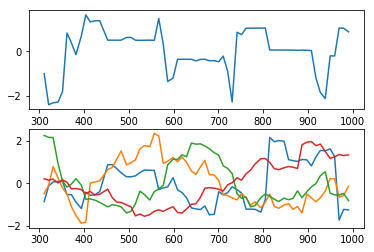

subject 36; gesture 5_1_1; avg 3.2967464855755098; sd 0.16094361057324558
subject 36; gesture 5_1_1; PoV: 0.7447594288582143
subject 36; gesture 6_1_1; avg 6.8047138659868995; sd 0.271792918257121
subject 36; gesture 6_1_1; PoV: 0.8439592865099216
subject 36; gesture 6_0_2; avg 3.3256293047786176; sd 0.5531693063772873
subject 36; gesture 6_0_2; PoV: 0.6697206119853779
subject 36; gesture 3_1_2; avg 3.550018745835143; sd 0.1573458900880126
subject 36; gesture 3_1_2; PoV: 0.7656180699615124


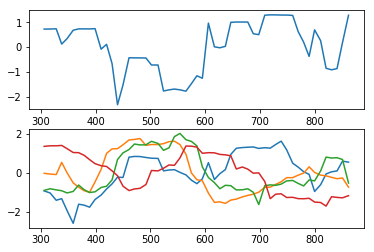

subject 36; gesture 3_1_1; avg 3.7467525047432226; sd 0.1674104481072485
subject 36; gesture 3_1_1; PoV: 0.7638647024906098


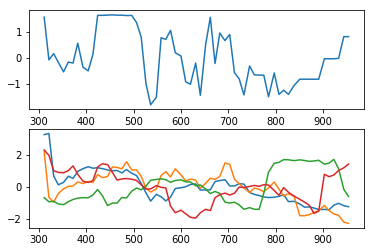

subject 36; gesture 6_0_1; avg 3.546654346208664; sd 0.15784250122992796
subject 36; gesture 6_0_1; PoV: 0.762407478024509
subject 36; gesture 5_0_1; avg 5.718711397920913; sd 0.1931359114966359
subject 36; gesture 5_0_1; PoV: 0.832216021556342
subject 36; gesture 4_0_2; avg 4.008745744543542; sd 0.18404784968958712
subject 36; gesture 4_0_2; PoV: 0.7759979659557218
subject 24; gesture 5_0_2; avg 2.1547625527786423; sd 0.1254612246918683
subject 24; gesture 5_0_2; PoV: 0.6590926456196815
subject 24; gesture 3_0_1; avg 5.461652275767834; sd 0.24384878753237518
subject 24; gesture 3_0_1; PoV: 0.8204378060086976


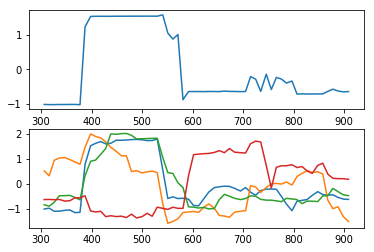

subject 24; gesture 4_1_1; avg 2.450632532242645; sd 0.1442798181390138
subject 24; gesture 4_1_1; PoV: 0.6862746901199481
subject 24; gesture 4_1_2; avg 2.499486726931655; sd 0.13103440708029693
subject 24; gesture 4_1_2; PoV: 0.6952026319811725
subject 24; gesture 5_1_2; avg 1.972397346920618; sd 0.12301861521740097
subject 24; gesture 5_1_2; PoV: 0.647308486354544
subject 24; gesture 6_1_2; avg 2.2944884177599296; sd 0.1333310594163455
subject 24; gesture 6_1_2; PoV: 0.6773621495149426
subject 24; gesture 4_0_1; avg 2.525032221221598; sd 0.14397927298999424
subject 24; gesture 4_0_1; PoV: 0.6932579078112945
subject 24; gesture 3_0_2; avg 4.503144326023067; sd 0.16405076360459103
subject 24; gesture 3_0_2; PoV: 0.7993529615840086


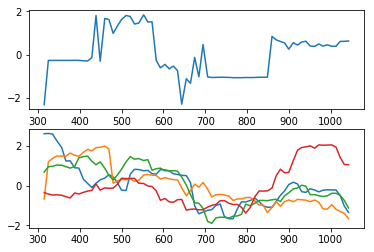

subject 24; gesture 5_1_1; avg 2.6958930156174183; sd 0.1336577332070249
subject 24; gesture 5_1_1; PoV: 0.7116470829324311
subject 24; gesture 6_1_1; avg 2.1218189584995515; sd 0.12206214102550368
subject 24; gesture 6_1_1; PoV: 0.6679677364905566
subject 24; gesture 6_0_2; avg 2.502473195281335; sd 0.13926621070615663
subject 24; gesture 6_0_2; PoV: 0.6923278085296423
subject 24; gesture 3_1_2; avg 3.3763389592364415; sd 0.14596307758572366
subject 24; gesture 3_1_2; PoV: 0.7549263386295444


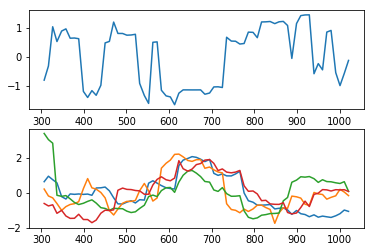

subject 24; gesture 3_1_1; avg 2.8371280480887404; sd 0.1395428285512523
subject 24; gesture 3_1_1; PoV: 0.7168003800107073


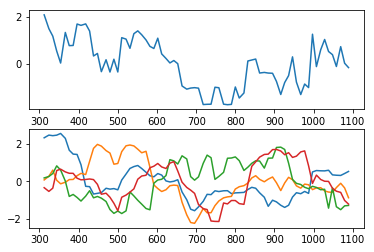

subject 24; gesture 6_0_1; avg 4.376885775580457; sd 0.20879146484426667
subject 24; gesture 6_0_1; PoV: 0.7856650277769079
subject 24; gesture 5_0_1; avg 2.1582189809786163; sd 0.12860836046863952
subject 24; gesture 5_0_1; PoV: 0.6668739018073175
subject 24; gesture 4_0_2; avg 2.316699605370782; sd 0.15447102199673604
subject 24; gesture 4_0_2; PoV: 0.6717836824970074
subject 33; gesture 5_0_2; avg 4.29310122364898; sd 0.1698970272187548
subject 33; gesture 5_0_2; PoV: 0.7900256269775127
subject 33; gesture 3_0_1; avg 3.799578622061723; sd 0.15919614381979963
subject 33; gesture 3_0_1; PoV: 0.7741672017934961


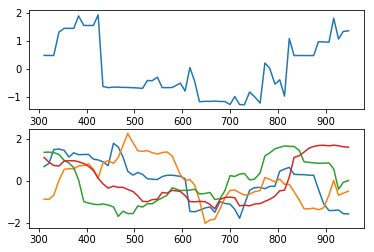

subject 33; gesture 4_1_1; avg 2.3668266217411946; sd 0.14231797652806707
subject 33; gesture 4_1_1; PoV: 0.6777725958067305
subject 33; gesture 4_1_2; avg 3.068352562517568; sd 0.15976056356079413
subject 33; gesture 4_1_2; PoV: 0.7320423670142896
subject 33; gesture 5_1_2; avg 3.590613435005517; sd 0.18764500966883993
subject 33; gesture 5_1_2; PoV: 0.7515220492154869
subject 33; gesture 6_1_2; avg 2.7253501939394855; sd 0.1556677908036618
subject 33; gesture 6_1_2; PoV: 0.7100113377333668
subject 33; gesture 4_0_1; avg 2.7958450712891754; sd 0.15297357913898016
subject 33; gesture 4_0_1; PoV: 0.7198947866814162
subject 33; gesture 3_0_2; avg 3.3698302660583024; sd 0.17250634941108142
subject 33; gesture 3_0_2; PoV: 0.7439423336943685


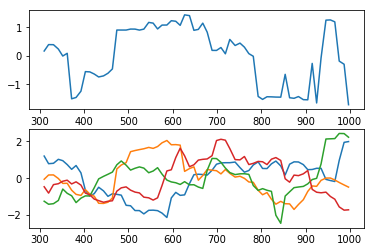

subject 33; gesture 5_1_1; avg 2.700371027579578; sd 0.14400000232379456
subject 33; gesture 5_1_1; PoV: 0.7103726720332519
subject 33; gesture 6_1_1; avg 4.104911727095088; sd 0.17569020004442715
subject 33; gesture 6_1_1; PoV: 0.7799877498287515
subject 33; gesture 6_0_2; avg 2.992096066576774; sd 0.1384954129346883
subject 33; gesture 6_0_2; PoV: 0.7299650281657265
subject 33; gesture 3_1_2; avg 2.8123057809214744; sd 0.16004721996701154
subject 33; gesture 3_1_2; PoV: 0.7171952199652324


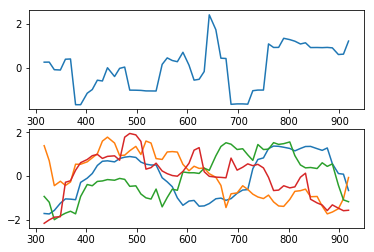

subject 33; gesture 3_1_1; avg 2.9465987439392984; sd 0.1579561855829588
subject 33; gesture 3_1_1; PoV: 0.7267458985799932


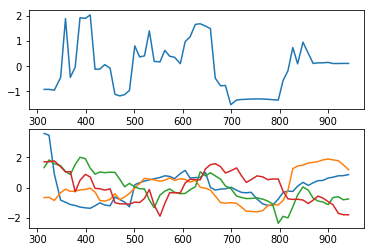

subject 33; gesture 6_0_1; avg 3.292863960445608; sd 0.16732760406254696
subject 33; gesture 6_0_1; PoV: 0.7414425503515393
subject 33; gesture 5_0_1; avg 3.16277212213976; sd 0.15302088867569172
subject 33; gesture 5_0_1; PoV: 0.7431503375233952
subject 33; gesture 4_0_2; avg 2.9179202524569137; sd 0.15829507701237117
subject 33; gesture 4_0_2; PoV: 0.7156418147518222
subject 11; gesture 5_0_2; avg 2.253066754800318; sd 0.13205935461805593
subject 11; gesture 5_0_2; PoV: 0.6774040073222785
subject 11; gesture 3_0_1; avg 2.2613235253137467; sd 0.13990371942520988
subject 11; gesture 3_0_1; PoV: 0.6694964409031935


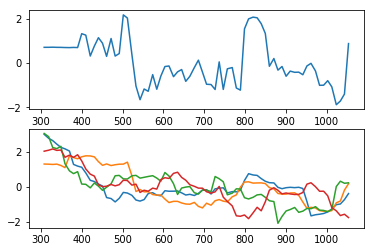

subject 11; gesture 4_1_1; avg 2.8433914366997235; sd 0.1876721991152221
subject 11; gesture 4_1_1; PoV: 0.7117929193577395
subject 11; gesture 4_1_2; avg 2.6046198078634806; sd 0.14206807803185129
subject 11; gesture 4_1_2; PoV: 0.7004440483258725
subject 11; gesture 5_1_2; avg 4.377844022988356; sd 0.17959538771822103
subject 11; gesture 5_1_2; PoV: 0.7858126085970011
subject 11; gesture 6_1_2; avg 5.295585935751186; sd 0.25190928924558753
subject 11; gesture 6_1_2; PoV: 0.8070589873032866
subject 11; gesture 4_0_1; avg 2.374036870177275; sd 0.15509193259781492
subject 11; gesture 4_0_1; PoV: 0.6780022894347465
subject 11; gesture 3_0_2; avg 3.234672874530681; sd 0.14244200915863053
subject 11; gesture 3_0_2; PoV: 0.7431804109282982


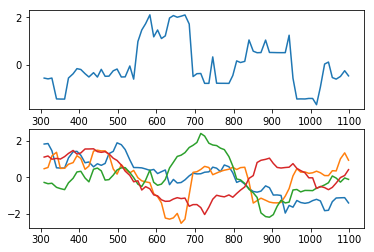

subject 11; gesture 5_1_1; avg 2.5724342373779483; sd 0.13536783815220402
subject 11; gesture 5_1_1; PoV: 0.7004188181280425
subject 11; gesture 6_1_1; avg 3.5784563385203887; sd 0.1385290265203432
subject 11; gesture 6_1_1; PoV: 0.7647101526059995
subject 11; gesture 6_0_2; avg 2.190939152469012; sd 0.1298244958906337
subject 11; gesture 6_0_2; PoV: 0.6729946836650601
subject 11; gesture 3_1_2; avg 2.3621299812884087; sd 0.13971950859859728
subject 11; gesture 3_1_2; PoV: 0.6844808481121143


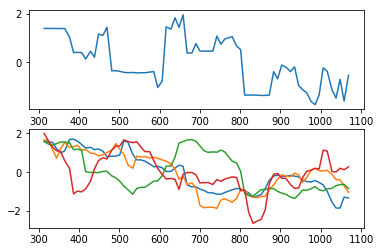

subject 11; gesture 3_1_1; avg 3.8838260303380334; sd 0.15106488449579433
subject 11; gesture 3_1_1; PoV: 0.7789502345716096


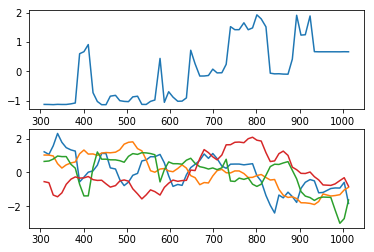

subject 11; gesture 6_0_1; avg 2.683657614135329; sd 0.166112798931433
subject 11; gesture 6_0_1; PoV: 0.7037808621457475
subject 11; gesture 5_0_1; avg 3.282390595446876; sd 0.17544269083346653
subject 11; gesture 5_0_1; PoV: 0.7352113600826344
subject 11; gesture 4_0_2; avg 2.122698408759067; sd 0.1286051305375769
subject 11; gesture 4_0_2; PoV: 0.6632980045398437
subject 35; gesture 5_0_2; avg 4.175326496074156; sd 0.18727597239729454
subject 35; gesture 5_0_2; PoV: 0.7839558784517479
subject 35; gesture 3_0_1; avg 3.402553811368843; sd 0.17094223496990227
subject 35; gesture 3_0_1; PoV: 0.7506042105678122


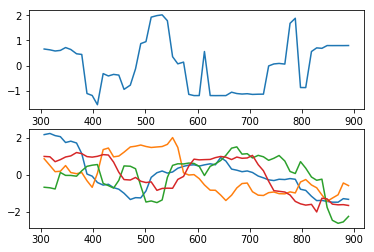

subject 35; gesture 4_1_1; avg 5.309024543813767; sd 0.1882703268216708
subject 35; gesture 4_1_1; PoV: 0.8216005450904019
subject 35; gesture 4_1_2; avg 3.273047565301959; sd 0.2063930288109362
subject 35; gesture 4_1_2; PoV: 0.7322907935283068
subject 35; gesture 5_1_2; avg 4.930153809592624; sd 0.19434941819476195
subject 35; gesture 5_1_2; PoV: 0.7988860884552452
subject 35; gesture 6_1_2; avg 5.4059150640303155; sd 0.27489711105405823
subject 35; gesture 6_1_2; PoV: 0.8059596564235549
subject 35; gesture 4_0_1; avg 3.6926210240230914; sd 0.15829959733676263
subject 35; gesture 4_0_1; PoV: 0.7674978245253701
subject 35; gesture 3_0_2; avg 2.3011921077922115; sd 0.15219611435076041
subject 35; gesture 3_0_2; PoV: 0.6714733596729784


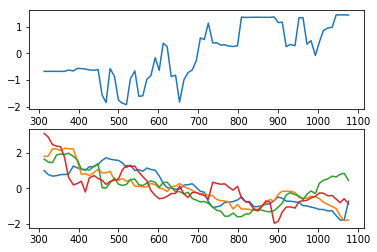

subject 35; gesture 5_1_1; avg 3.4947797170185986; sd 0.15408002425512
subject 35; gesture 5_1_1; PoV: 0.7612598773409396
subject 35; gesture 6_1_1; avg 5.674759916136133; sd 0.184813631424325
subject 35; gesture 6_1_1; PoV: 0.8342655679458024
subject 35; gesture 6_0_2; avg 2.6970592905319304; sd 0.1432755168579985
subject 35; gesture 6_0_2; PoV: 0.7038790947015827
subject 35; gesture 3_1_2; avg 4.335556377526248; sd 0.23904238810543052
subject 35; gesture 3_1_2; PoV: 0.7757659957568307


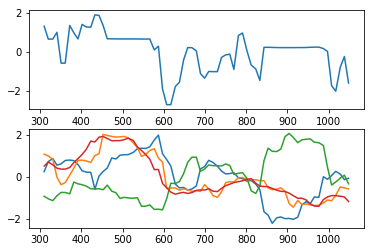

subject 35; gesture 3_1_1; avg 3.6262795155044802; sd 0.5734543385086422
subject 35; gesture 3_1_1; PoV: 0.6936780383311983


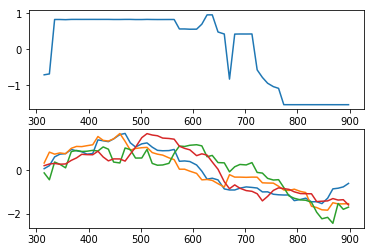

subject 35; gesture 6_0_1; avg 2.850481720421507; sd 0.13988172502078797
subject 35; gesture 6_0_1; PoV: 0.7242600556042096
subject 35; gesture 5_0_1; avg 3.253392867772709; sd 0.1789906093611987
subject 35; gesture 5_0_1; PoV: 0.738088133777459
subject 35; gesture 4_0_2; avg 3.0379341334927297; sd 0.14552421833505522
subject 35; gesture 4_0_2; PoV: 0.7259216799198559
subject 22; gesture 5_0_2; avg 4.288344700154811; sd 0.1731512090033513
subject 22; gesture 5_0_2; PoV: 0.785727650522587
subject 22; gesture 3_0_1; avg 6.033165205600836; sd 0.17364936373041395
subject 22; gesture 3_0_1; PoV: 0.8448809802710873


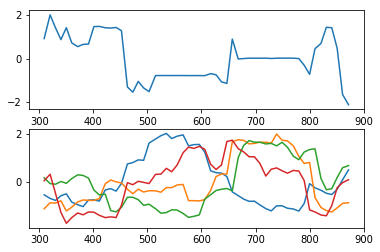

subject 22; gesture 4_1_1; avg 2.975584734484497; sd 0.14657926960221668
subject 22; gesture 4_1_1; PoV: 0.7325300818779263
subject 22; gesture 4_1_2; avg 2.8837327272324664; sd 0.1521364971057516
subject 22; gesture 4_1_2; PoV: 0.7207081218705221
subject 22; gesture 5_1_2; avg 3.066646147350298; sd 0.14984410135162443
subject 22; gesture 5_1_2; PoV: 0.7322478342085286
subject 22; gesture 6_1_2; avg 5.499989344113776; sd 0.18014102909322385
subject 22; gesture 6_1_2; PoV: 0.8256152192368523
subject 22; gesture 4_0_1; avg 2.683588108293371; sd 0.17040778314521363
subject 22; gesture 4_0_1; PoV: 0.698827519053426
subject 22; gesture 3_0_2; avg 4.894733543693812; sd 0.15622788858305225
subject 22; gesture 3_0_2; PoV: 0.8161727874078929


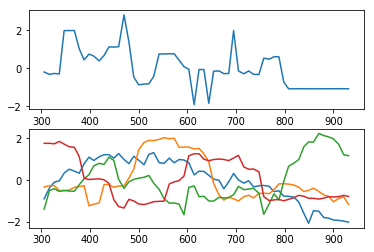

subject 22; gesture 5_1_1; avg 3.102743440671624; sd 0.1542814337612418
subject 22; gesture 5_1_1; PoV: 0.7302576445354195
subject 22; gesture 6_1_1; avg 3.752702190698408; sd 0.1532455301738562
subject 22; gesture 6_1_1; PoV: 0.7701898515489751
subject 22; gesture 6_0_2; avg 3.783272997331711; sd 0.1765826380853889
subject 22; gesture 6_0_2; PoV: 0.7600060173610674
subject 22; gesture 3_1_2; avg 4.749616513451765; sd 0.1530394032708386
subject 22; gesture 3_1_2; PoV: 0.8136687233875147


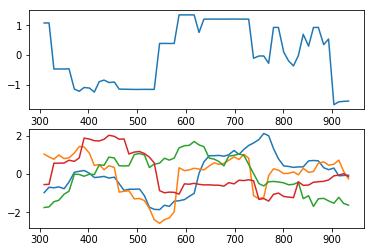

subject 22; gesture 3_1_1; avg 2.3233307701978307; sd 0.1402325002900193
subject 22; gesture 3_1_1; PoV: 0.679631239675207


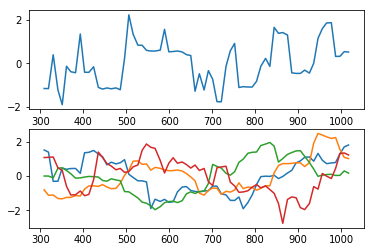

subject 22; gesture 6_0_1; avg 4.2498452900220345; sd 0.16906097617987217
subject 22; gesture 6_0_1; PoV: 0.79028174692504
subject 22; gesture 5_0_1; avg 3.0671624301572473; sd 0.14498223409589947
subject 22; gesture 5_0_1; PoV: 0.7365017335355856
subject 22; gesture 4_0_2; avg 3.314914356060597; sd 0.16109461047895224
subject 22; gesture 4_0_2; PoV: 0.7474474683691033
subject 34; gesture 5_0_2; avg 2.1411319718923005; sd 0.12578484126667033
subject 34; gesture 5_0_2; PoV: 0.6643760499027537
subject 34; gesture 3_0_1; avg 2.642936928685432; sd 0.14351516817945034
subject 34; gesture 3_0_1; PoV: 0.7031095256178762


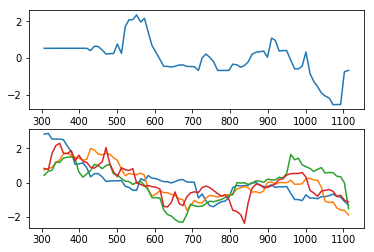

subject 34; gesture 4_1_1; avg 4.704488774737509; sd 0.19228463966570775
subject 34; gesture 4_1_1; PoV: 0.7952340541678675
subject 34; gesture 4_1_2; avg 2.3785109936366804; sd 0.17539213271368279
subject 34; gesture 4_1_2; PoV: 0.6713362030954315
subject 34; gesture 5_1_2; avg 3.088628209223386; sd 0.23108135078870035
subject 34; gesture 5_1_2; PoV: 0.7117655604459775
subject 34; gesture 6_1_2; avg 4.277497244175961; sd 0.15989619786556167
subject 34; gesture 6_1_2; PoV: 0.7904487471025132
subject 34; gesture 4_0_1; avg 2.457054351007914; sd 0.13748501928844362
subject 34; gesture 4_0_1; PoV: 0.6924912614458562
subject 34; gesture 3_0_2; avg 3.014895436803354; sd 0.13393427500869373
subject 34; gesture 3_0_2; PoV: 0.738636731863496


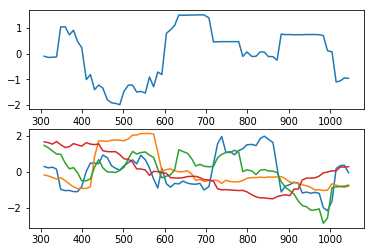

subject 34; gesture 5_1_1; avg 4.749754952775287; sd 0.18849918639481061
subject 34; gesture 5_1_1; PoV: 0.8027646642681028
subject 34; gesture 6_1_1; avg 2.7982202215520524; sd 0.14470022196330085
subject 34; gesture 6_1_1; PoV: 0.7150832542867086
subject 34; gesture 6_0_2; avg 2.609792246264754; sd 0.13790561982705915
subject 34; gesture 6_0_2; PoV: 0.7015316460946132
subject 34; gesture 3_1_2; avg 3.43182797727158; sd 0.16805103815024888
subject 34; gesture 3_1_2; PoV: 0.744885089037302


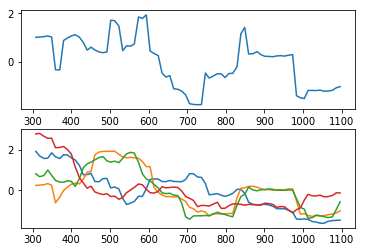

subject 34; gesture 3_1_1; avg 3.259034365306374; sd 0.15216839315693784
subject 34; gesture 3_1_1; PoV: 0.7441425594875118


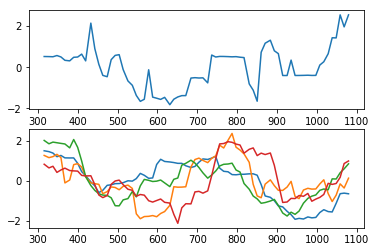

subject 34; gesture 6_0_1; avg 2.197099617348582; sd 0.11936990483861912
subject 34; gesture 6_0_1; PoV: 0.6697088706987748
subject 34; gesture 5_0_1; avg 3.277422336587067; sd 0.20231234379989804
subject 34; gesture 5_0_1; PoV: 0.7329737251274543
subject 34; gesture 4_0_2; avg 1.7727053604142313; sd 0.11527411009063941
subject 34; gesture 4_0_2; PoV: 0.6259771283374237
subject 10; gesture 5_0_2; avg 3.4693771756265344; sd 0.34033538281011844
subject 10; gesture 5_0_2; PoV: 0.7233101914203384
subject 10; gesture 3_0_1; avg 4.4209362107168015; sd 0.15840005848362843
subject 10; gesture 3_0_1; PoV: 0.7968855092445363


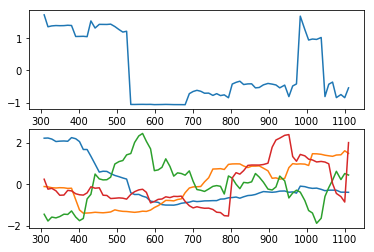

subject 10; gesture 4_1_1; avg 5.727977990457133; sd 0.16002539914606934
subject 10; gesture 4_1_1; PoV: 0.8388608917501705
subject 10; gesture 4_1_2; avg 2.5917555124560865; sd 0.13511381921902382
subject 10; gesture 4_1_2; PoV: 0.7024004442476447
subject 10; gesture 5_1_2; avg 3.092738238095814; sd 0.15214751169517207
subject 10; gesture 5_1_2; PoV: 0.7313894473732919
subject 10; gesture 6_1_2; avg 2.3207195185496596; sd 0.14180755505061413
subject 10; gesture 6_1_2; PoV: 0.6754067500090748
subject 10; gesture 4_0_1; avg 3.4085200883150537; sd 0.20170224086810362
subject 10; gesture 4_0_1; PoV: 0.7403762233591616
subject 10; gesture 3_0_2; avg 6.273205766584245; sd 0.18747917163502106
subject 10; gesture 3_0_2; PoV: 0.8429843063837535


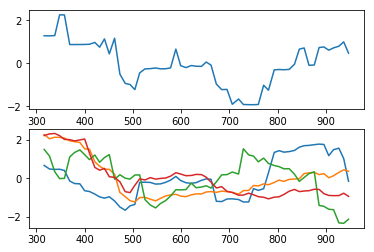

subject 10; gesture 5_1_1; avg 4.098316169930197; sd 0.4742446668946847
subject 10; gesture 5_1_1; PoV: 0.7210130592407549
subject 10; gesture 6_1_1; avg 2.4820059417232603; sd 0.15773576554231908
subject 10; gesture 6_1_1; PoV: 0.6890661603896203
subject 10; gesture 6_0_2; avg 3.4089480964195387; sd 0.1430630024106972
subject 10; gesture 6_0_2; PoV: 0.7502425192145578
subject 10; gesture 3_1_2; avg 4.678168829372261; sd 0.15453826715871422
subject 10; gesture 3_1_2; PoV: 0.8077473992817001


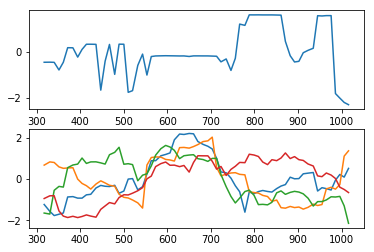

subject 10; gesture 3_1_1; avg 3.1218701425701734; sd 0.15136993160010934
subject 10; gesture 3_1_1; PoV: 0.7429041515858514


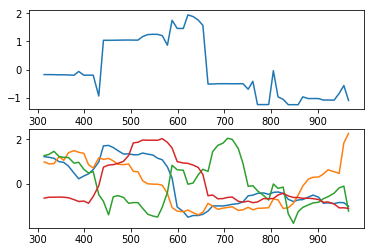

subject 10; gesture 6_0_1; avg 3.3339324291028585; sd 0.15412931256788204
subject 10; gesture 6_0_1; PoV: 0.7488288838361273
subject 10; gesture 5_0_1; avg 2.892585008903311; sd 0.2820281130105508
subject 10; gesture 5_0_1; PoV: 0.6945838237161372
subject 10; gesture 4_0_2; avg 3.001102747431033; sd 0.1526924616506327
subject 10; gesture 4_0_2; PoV: 0.7277577574402087
subject 02; gesture 5_0_2; avg 3.202317242514121; sd 0.14510468371476748
subject 02; gesture 5_0_2; PoV: 0.7389451273107426
subject 02; gesture 3_0_1; avg 6.82037655057857; sd 0.20197994386980833
subject 02; gesture 3_0_1; PoV: 0.8473883214884143


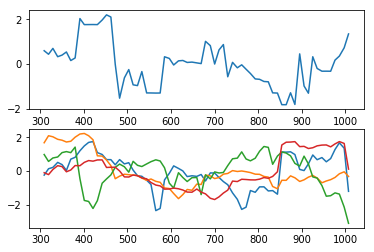

subject 02; gesture 4_1_1; avg 3.7094842153344736; sd 0.17369003460270346
subject 02; gesture 4_1_1; PoV: 0.7590018636065204
subject 02; gesture 4_1_2; avg 3.910849292214911; sd 0.16548660270558177
subject 02; gesture 4_1_2; PoV: 0.7772123602235687
subject 02; gesture 5_1_2; avg 3.0978396897683056; sd 0.16245513576044254
subject 02; gesture 5_1_2; PoV: 0.7306238939281132
subject 02; gesture 6_1_2; avg 2.5427442343854296; sd 0.1445958606590794
subject 02; gesture 6_1_2; PoV: 0.6971496352547573
subject 02; gesture 4_0_1; avg 2.4377509643631763; sd 0.13672077736791094
subject 02; gesture 4_0_1; PoV: 0.6920648069613162
subject 02; gesture 3_0_2; avg 4.349902322711739; sd 0.16098356243110712
subject 02; gesture 3_0_2; PoV: 0.7932473554769568


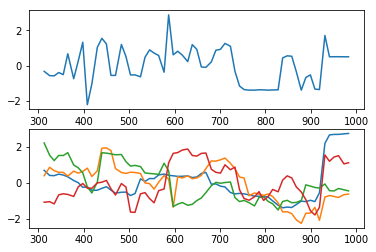

subject 02; gesture 5_1_1; avg 3.751395829067325; sd 0.15040353502074774
subject 02; gesture 5_1_1; PoV: 0.7742017193193776
subject 02; gesture 6_1_1; avg 4.526585204862785; sd 0.22671669004967576
subject 02; gesture 6_1_1; PoV: 0.7831278129353435
subject 02; gesture 6_0_2; avg 2.9142728611458653; sd 0.1284120875093303
subject 02; gesture 6_0_2; PoV: 0.7280051948582233
subject 02; gesture 3_1_2; avg 2.6659066159954645; sd 0.14435997037755563
subject 02; gesture 3_1_2; PoV: 0.7094082781803529


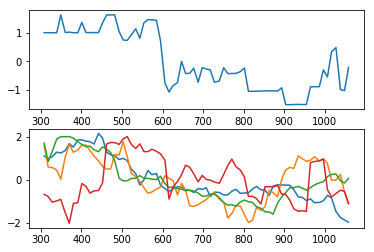

subject 02; gesture 3_1_1; avg 2.9502873377614085; sd 0.15481045295047197
subject 02; gesture 3_1_1; PoV: 0.7232927978372031


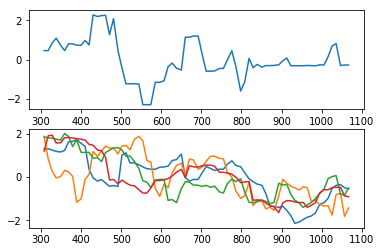

subject 02; gesture 6_0_1; avg 3.582254971307876; sd 0.13487022509401672
subject 02; gesture 6_0_1; PoV: 0.7681921582207358
subject 02; gesture 5_0_1; avg 3.9924124104995573; sd 0.15807050362739677
subject 02; gesture 5_0_1; PoV: 0.7777983581174059
subject 02; gesture 4_0_2; avg 3.736879973891809; sd 0.14778537006973136
subject 02; gesture 4_0_2; PoV: 0.7755441246747818


In [5]:
decomp_syn = {}

for s, gdict in dict_synerg.items():
    decomp_syn[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_syn[s][g] = res
        # plot results
        if g[0] != "3": continue
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,3])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,4])
        plt.show()

---

In [6]:
# organize vectors by gesture
gest_dict = {"3":[], "4":[], "5":[], "6":[]}

for s, gdict in decomp_syn.items():
    for g, a in gdict.items():
        if g[0] not in ["3", "4", "5", "6"]: continue
        gest_dict[g[0]].append(a)

In [7]:
comp_dict = {"3":{"3":[], "4":[], "5":[], "6":[]},
             "4":{"3":[], "4":[], "5":[], "6":[]},
             "5":{"3":[], "4":[], "5":[], "6":[]},
             "6":{"3":[], "4":[], "5":[], "6":[]}}

for g1 in ["3", "4", "5", "6"]:
    for g2 in ["3", "4", "5", "6"]:
        for i in range(144):
            for j in range(144):
                if i == j and g1 == g2: continue
                comp_dict[g1][g2].append(dtw(gest_dict[g1][i], gest_dict[g2][j]))

In [8]:
for g1 in ["3", "4", "5", "6"]:
    print(f"gesture {g1} dtw similarities w/ other gestures:")
    for g2 in ["3", "4", "5", "6"]:
        print(f"avg similarity vs gesture {g2}: {np.mean(comp_dict[g1][g2])}")

gesture 3 dtw similarities w/ other gestures:
avg similarity vs gesture 3: 6.688498053482441
avg similarity vs gesture 4: 6.805265665045556
avg similarity vs gesture 5: 6.738364571214341
avg similarity vs gesture 6: 6.75546001562845
gesture 4 dtw similarities w/ other gestures:
avg similarity vs gesture 3: 6.805265665045558
avg similarity vs gesture 4: 6.885773610108721
avg similarity vs gesture 5: 6.864131506025436
avg similarity vs gesture 6: 6.919132726412548
gesture 5 dtw similarities w/ other gestures:
avg similarity vs gesture 3: 6.738364571214341
avg similarity vs gesture 4: 6.864131506025436
avg similarity vs gesture 5: 6.793837429989386
avg similarity vs gesture 6: 6.821545019821051
gesture 6 dtw similarities w/ other gestures:
avg similarity vs gesture 3: 6.75546001562845
avg similarity vs gesture 4: 6.91913272641255
avg similarity vs gesture 5: 6.821545019821051
avg similarity vs gesture 6: 6.845591913862961



---

In [9]:
subj_lab = []
gest_lab = []
arrays = []


for s, gdict in decomp_syn.items():
    for g, a in gdict.items():
        subj_lab.append(s)
        gest_lab.append(int(g[0]))
        arrays.append(a)

# calculate dtw between all arrays and make predictions
predicts = []
for n, g1 in enumerate(arrays):
    g1_dtws = []
    for m, g2 in enumerate(arrays):
        g1_dtws.append(dtw(g1, g2))
    g1_dtws = np.array(g1_dtws)
    pred_idx = np.argsort(g1_dtws)[1] # index of 2nd closest array by dtw; 1st closest is self
    predicts.append(gest_lab[pred_idx])

acc = (sum(np.array(gest_lab) == np.array(predicts)) / len(gest_lab)) * 100

print(f"accuracy: {acc}%")

accuracy: 23.78472222222222%


---

In [10]:
from ripser import ripser, Rips
from persim import plot_diagrams, PersImage, bottleneck
from TDA_helper_fcns import sublevel_set_time_series_dist

In [11]:
px = 20
sd = 1

In [12]:
rips = Rips(maxdim=0, verbose=True) # rips complex
pim = PersImage(pixels=[px,px], spread=sd)

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
PersImage(pixels=[20, 20], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


In [17]:
g1.shape

(62, 6)

In [18]:
subj_lab = []
gest_lab = []
arrays = []

for s, gdict in decomp_syn.items():
    for g, a in gdict.items():
        subj_lab.append(s)
        gest_lab.append(int(g[0]))
        arrays.append(a)

# calculate bottleneck distance between all pds and make predictions
predicts = []
for n, g1 in enumerate(arrays):
    sls1 = sublevel_set_time_series_dist(g1)
    dgm1 = rips.fit_transform(sls1, distance_matrix=True)[0]
    g1_bottlenecks = []
    for m, g2 in enumerate(arrays):
        sls2 = sublevel_set_time_series_dist(g2)
        dgm2 = rips.fit_transform(sls2, distance_matrix=True)[0]
        distance_bottleneck, (matching, D) = bottleneck(dgm1, dgm2, matching=True)
        g1_bottlenecks.append(distance_bottleneck)
    g1_bottlenecks = np.array(g1_bottlenecks)
    pred_idx = np.argsort(g1_bottlenecks)[1] # index of 2nd closest array by dtw; 1st closest is self
    predicts.append(gest_lab[pred_idx])

acc = (sum(np.array(gest_lab) == np.array(predicts)) / len(gest_lab)) * 100

print(f"accuracy: {acc}%")

accuracy: 26.38888888888889%
